## Segmentação de Clientes de Cartão de Crédito: Análise Exploratória, Clusterização e Modelagem Preditiva

<div style="text-align: center; margin-bottom: 20px;">
  <img src="../03-Recursos/credit_card_customer_clustering_image.png" style="width: 600px; display: block; margin-left: auto; margin-right: auto;"/>
</div>

## SUMÁRIO <a id="sumário"></a>

[1. Introdução 🚀](#1-introdução) <br>

[2. Objetivo do Projeto 🎯](#2-objetivo-do-projeto) <br>

[3. Importação de Bibliotecas e Configurações Iniciais 📚](#3-importação-de-bibliotecas-e-configurações-iniciais) <br>

[4. Carregamento e Pré-processamento dos Dados 🔄](#4-carregamento-e-pré-processamento-dos-dados) <br>

[5. Análise Exploratória de Dados (EDA) 📊](#5-análise-exploratória-de-dados-eda) <br>

[6. Análise de Segmentação (Clusterização) 🔍](#6-análise-de-segmentação-clusterização) <br>

[7. Modelagem Preditiva 🤖](#7-modelagem-preditiva) <br>

[8. Avaliação dos Modelos 📏](#8-avaliação-dos-modelos) <br>

[9. Conclusão e Recomendações 🏁](#9-conclusão-e-recomendações) <br>

## 1. Introdução 🚀 <a id="1-introdução"></a> 
[Voltar ao Sumário](#sumário)

No setor financeiro, compreender o comportamento dos clientes é fundamental para o desenvolvimento de estratégias de marketing eficazes. A segmentação de clientes permite que as instituições financeiras identifiquem grupos com características e necessidades semelhantes, possibilitando a oferta de produtos e serviços mais alinhados às expectativas de cada segmento. Essa abordagem personalizada não só aumenta a satisfação dos clientes, mas também otimiza os recursos de marketing, direcionando esforços para os públicos com maior potencial de conversão.

Este projeto visa analisar o comportamento de uso de aproximadamente 9.000 titulares ativos de cartões de crédito ao longo dos últimos seis meses. Utilizando um conjunto de 18 variáveis comportamentais, serão aplicadas técnicas de análise exploratória de dados, segmentação por meio de algoritmos de clusterização e modelagem preditiva. O objetivo é identificar padrões de uso e desenvolver estratégias de marketing direcionadas que atendam às necessidades específicas de cada segmento de clientes.

A aplicação de técnicas de aprendizado de máquina para a segmentação de clientes no setor financeiro tem se mostrado uma abordagem eficaz para a personalização de ofertas e melhoria do relacionamento com o cliente. Ao compreender os diferentes perfis de clientes, as instituições financeiras podem adaptar suas estratégias de marketing, aumentando a eficiência das campanhas e a satisfação dos clientes.

Além disso, a modelagem preditiva desempenha um papel crucial ao permitir que as instituições financeiras antecipem comportamentos futuros dos clientes, como a probabilidade de inadimplência ou a propensão à aquisição de novos produtos. Ao analisar dados históricos e atuais, os modelos preditivos fornecem insights que auxiliam na tomada de decisões proativas, mitigando riscos e aproveitando oportunidades de mercado.

Este estudo contribuirá para a identificação de segmentos de clientes com base em seus comportamentos de uso de cartão de crédito, fornecendo insights valiosos para a definição de estratégias de marketing mais assertivas e personalizadas, bem como para a implementação de ações preditivas que aprimorem a gestão de riscos e a oferta de produtos financeiros.

## 2. Objetivo do Projeto 🎯 <a id="2-objetivo-do-projeto"></a>
[Voltar ao Sumário](#sumário)

Este projeto tem como objetivo principal desenvolver uma segmentação de clientes de cartão de crédito para aprimorar as estratégias de marketing de uma instituição financeira. Para alcançar esse objetivo, serão realizadas as seguintes etapas:

1. **Análise Exploratória de Dados (EDA)**: Examinar detalhadamente o conjunto de dados para compreender o comportamento dos clientes, identificar padrões de uso, tendências e possíveis anomalias. Esta etapa fornecerá insights iniciais sobre os dados e embasará as próximas fases do projeto.

2. **Análise de Segmentação (Clusterização)**: Aplicar técnicas de aprendizado não supervisionado para agrupar clientes com características e comportamentos semelhantes. A clusterização permitirá identificar segmentos distintos dentro da base de clientes, auxiliando na personalização de ofertas e estratégias de marketing direcionadas.

3. **Modelagem Preditiva**: Desenvolver modelos de aprendizado supervisionado para prever comportamentos futuros dos clientes, como a probabilidade de inadimplência ou a propensão à aquisição de novos produtos. A modelagem preditiva fornecerá subsídios para ações proativas, mitigando riscos e aproveitando oportunidades de mercado.

Ao final, espera-se que este projeto forneça uma compreensão aprofundada dos diferentes perfis de clientes, permitindo à instituição financeira elaborar estratégias de marketing mais assertivas e personalizadas, além de melhorar a gestão de riscos e a oferta de produtos financeiros.

## 3. Importação de Bibliotecas e Configurações Iniciais 📚 <a id="3-importação-de-bibliotecas-e-configurações-iniciais"></a>

Nesta seção, importaremos as bibliotecas essenciais para a análise de dados, visualização e construção de modelos de machine learning. Além disso, definiremos configurações iniciais para garantir a consistência e a qualidade das visualizações ao longo do projeto.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from platform import python_version
import warnings
import sklearn  # Importação direta para exibição da versão

# Pré-processamento de dados
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.decomposition import PCA

# Modelagem e Validação
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV,
    cross_val_score
)
from sklearn.pipeline import Pipeline

# Modelos Supervisionados
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Clusterização
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Métricas
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    confusion_matrix,
    classification_report,
    f1_score,
    make_scorer
)

# Configuração de estilo para gráficos
sns.set(style="whitegrid")

# Supressão de avisos desnecessários
warnings.filterwarnings("ignore", category=RuntimeWarning)  # Ignorar RuntimeWarnings
warnings.filterwarnings("ignore", category=UserWarning)     # Ignorar UserWarnings

# Exibição das versões das bibliotecas e do Python
library_versions = {
    "Pandas": pd.__version__,
    "NumPy": np.__version__,
    "Matplotlib": matplotlib.__version__,
    "Seaborn": sns.__version__,
    "Scikit-Learn": sklearn.__version__,
}

print("Versões das Bibliotecas:\n")
print(f"{'Biblioteca':<20} | {'Versão':>10}")
for nome, versao in library_versions.items():
    print(f"{nome:<20} | {versao:>10}")

print("\nVersão do Python:")
print(python_version())

Versões das Bibliotecas:

Biblioteca           |     Versão
Pandas               |      1.5.3
NumPy                |     1.24.3
Matplotlib           |      3.7.1
Seaborn              |     0.12.2
Scikit-Learn         |      1.5.1

Versão do Python:
3.11.10


## 4. Carregamento e Pré-Processamento dos Dados 🔄 <a id="4-carregamento-e-pré-processamento-dos-dados"></a>
[Voltar ao Sumário](#sumário)

Nesta seção, realizamos as seguintes etapas:

1. **Carregamento dos dados**: Importamos o conjunto de dados de clientes de cartão de crédito para o ambiente de análise.

2. **Visualização inicial**: Exibimos as primeiras linhas do dataset para compreender sua estrutura e conteúdo.

3. **Renomeação de colunas**: Traduzimos os nomes das colunas para o português, adotando o formato *snake_case* para padronização.

4. **Verificação de valores ausentes**: Identificamos e removemos registros com valores nulos nas colunas 'valor_minimo_pagamentos' e 'limite_credito', devido à baixa quantidade de dados faltantes.

5. **Detecção de duplicatas**: Confirmamos a ausência de registros duplicados no dataset.

Essas ações asseguram que os dados estejam limpos e estruturados adequadamente para as análises subsequentes.

In [2]:
#Leitura e exibição do dataset de treino
df = pd.read_csv("../01-Base-de-Dados/credit_card_clients_base.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Dicionário com nomes das colunas originais, novos nomes em português (snake_case) e descrições
colunas_traduzidas_descricao = {
    "CUST_ID": ("id_cliente", "Identificação única do titular do cartão de crédito."),
    "BALANCE": ("saldo", "Valor do saldo restante na conta para realizar compras."),
    "BALANCE_FREQUENCY": ("frequencia_atualizacao_saldo", "Frequência com que o saldo é atualizado (0 = raramente, 1 = frequentemente)."),
    "PURCHASES": ("valor_total_compras", "Valor total das compras feitas na conta."),
    "ONEOFF_PURCHASES": ("valor_compras_unicas", "Valor das compras feitas em uma única transação."),
    "INSTALLMENTS_PURCHASES": ("valor_compras_parceladas", "Valor das compras realizadas em parcelas."),
    "CASH_ADVANCE": ("valor_adiantamento_dinheiro", "Valor de dinheiro adiantado fornecido ao usuário."),
    "PURCHASES_FREQUENCY": ("frequencia_compras", "Frequência com que as compras são realizadas (0 = raramente, 1 = frequentemente)."),
    "ONEOFF_PURCHASES_FREQUENCY": ("frequencia_compras_unicas", "Frequência de compras realizadas em uma única transação (0 = raramente, 1 = frequentemente)."),
    "PURCHASES_INSTALLMENTS_FREQUENCY": ("frequencia_compras_parceladas", "Frequência de compras realizadas em parcelas (0 = raramente, 1 = frequentemente)."),
    "CASH_ADVANCE_FREQUENCY": ("frequencia_adiantamento_dinheiro", "Frequência com que o adiantamento de dinheiro é utilizado."),
    "CASH_ADVANCE_TRX": ("numero_transacoes_adiantamento_dinheiro", "Número de transações realizadas com adiantamento de dinheiro."),
    "PURCHASES_TRX": ("numero_transacoes_compras", "Número de transações de compras realizadas."),
    "CREDIT_LIMIT": ("limite_credito", "Limite de crédito disponível para o usuário."),
    "PAYMENTS": ("valor_pagamentos", "Valor total dos pagamentos realizados pelo usuário."),
    "MINIMUM_PAYMENTS": ("valor_minimo_pagamentos", "Valor mínimo dos pagamentos realizados pelo usuário."),
    "PRC_FULL_PAYMENT": ("percentual_pagamento_integral", "Percentual do pagamento integral realizado pelo usuário."),
    "TENURE": ("tempo_servico", "Duração do serviço de cartão de crédito para o usuário."),
}

# Aplicando as novas nomenclaturas ao DataFrame
df.rename(columns={original: traducao for original, (traducao, _) in colunas_traduzidas_descricao.items()}, inplace=True)

# Criando um DataFrame com as descrições em português
df_descricao_colunas = pd.DataFrame(
    [(novo_nome, descricao) for _, (novo_nome, descricao) in colunas_traduzidas_descricao.items()],
    columns=["Coluna", "Descrição"]
)

# Exibindo o DataFrame de descrições para visualização
df_descricao_colunas

,Coluna,Descrição
0,id_cliente,Identificação única do titular do cartão de cr...
1,saldo,Valor do saldo restante na conta para realizar...
2,frequencia_atualizacao_saldo,Frequência com que o saldo é atualizado (0 = r...
3,valor_total_compras,Valor total das compras feitas na conta.
4,valor_compras_unicas,Valor das compras feitas em uma única transação.
5,valor_compras_parceladas,Valor das compras realizadas em parcelas.
6,valor_adiantamento_dinheiro,Valor de dinheiro adiantado fornecido ao usuário.
7,frequencia_compras,Frequência com que as compras são realizadas (...
8,frequencia_compras_unicas,Frequência de compras realizadas em uma única ...
9,frequencia_compras_parceladas,Frequência de compras realizadas em parcelas (...


In [4]:
# Verificar informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id_cliente                               8950 non-null   object 
 1   saldo                                    8950 non-null   float64
 2   frequencia_atualizacao_saldo             8950 non-null   float64
 3   valor_total_compras                      8950 non-null   float64
 4   valor_compras_unicas                     8950 non-null   float64
 5   valor_compras_parceladas                 8950 non-null   float64
 6   valor_adiantamento_dinheiro              8950 non-null   float64
 7   frequencia_compras                       8950 non-null   float64
 8   frequencia_compras_unicas                8950 non-null   float64
 9   frequencia_compras_parceladas            8950 non-null   float64
 10  frequencia_adiantamento_dinheiro         8950 no

In [5]:
# Calcular a quantidade de valores nulos por coluna
valores_nulos = df.isnull().sum()

# Calcular a porcentagem de valores nulos por coluna
percentual_nulos = (valores_nulos / len(df)) * 100

# Combinar as informações em um DataFrame para melhor visualização
tabela_nulos = pd.DataFrame({
    'Quantidade de Nulos': valores_nulos,
    'Percentual de Nulos (%)': percentual_nulos
})

# Exibir a tabela resultante
tabela_nulos

,Quantidade de Nulos,Percentual de Nulos (%)
id_cliente,0,0.000000
saldo,0,0.000000
frequencia_atualizacao_saldo,0,0.000000
valor_total_compras,0,0.000000
valor_compras_unicas,0,0.000000
valor_compras_parceladas,0,0.000000
valor_adiantamento_dinheiro,0,0.000000
frequencia_compras,0,0.000000
frequencia_compras_unicas,0,0.000000
frequencia_compras_parceladas,0,0.000000


In [6]:
# Calcular a porcentagem de valores nulos por coluna
percentual_nulos = df.isnull().mean() * 100

# Exibir o resultado
print("Porcentagem de valores nulos por coluna:")
print(percentual_nulos)

Porcentagem de valores nulos por coluna:
id_cliente                                 0.000000
saldo                                      0.000000
frequencia_atualizacao_saldo               0.000000
valor_total_compras                        0.000000
valor_compras_unicas                       0.000000
valor_compras_parceladas                   0.000000
valor_adiantamento_dinheiro                0.000000
frequencia_compras                         0.000000
frequencia_compras_unicas                  0.000000
frequencia_compras_parceladas              0.000000
frequencia_adiantamento_dinheiro           0.000000
numero_transacoes_adiantamento_dinheiro    0.000000
numero_transacoes_compras                  0.000000
limite_credito                             0.011173
valor_pagamentos                           0.000000
valor_minimo_pagamentos                    3.497207
percentual_pagamento_integral              0.000000
tempo_servico                              0.000000
dtype: float64


In [7]:
# Sendo a quantidade de dados nulos bem pequena vmaos remover linhas com valores nulos nas colunas
df = df.dropna(subset=['valor_minimo_pagamentos', 'limite_credito'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id_cliente                               8636 non-null   object 
 1   saldo                                    8636 non-null   float64
 2   frequencia_atualizacao_saldo             8636 non-null   float64
 3   valor_total_compras                      8636 non-null   float64
 4   valor_compras_unicas                     8636 non-null   float64
 5   valor_compras_parceladas                 8636 non-null   float64
 6   valor_adiantamento_dinheiro              8636 non-null   float64
 7   frequencia_compras                       8636 non-null   float64
 8   frequencia_compras_unicas                8636 non-null   float64
 9   frequencia_compras_parceladas            8636 non-null   float64
 10  frequencia_adiantamento_dinheiro         8636 no

In [8]:
# Contando o número de linhas duplicadas no DataFrame
num_duplicatas = df.duplicated().sum()

# Exibindo o número de linhas duplicadas
print(f"Total de linhas duplicadas: {num_duplicatas}")

Total de linhas duplicadas: 0


## 5. Análise Exploratória de Dados (EDA) 📊 <a id="5-análise-exploratória-de-dados-eda"></a>
[Voltar ao Sumário](#sumário)

Nesta seção, realizamos uma análise exploratória das variáveis do dataset de clientes de cartão de crédito. A análise exploratória nos permite identificar padrões gerais, entender as distribuições e avaliar a relação entre as variáveis, com o objetivo de preparar os dados para a clusterização.

### [5.1 Análise das Variáveis Numéricas](#5.1-análise-das-variáveis-numéricas)
Exploramos as variáveis numéricas, considerando:
- **Medidas Estatísticas**: Calculamos média, mediana, desvio padrão, valor mínimo e valor máximo para entender a centralidade e dispersão dos dados.
- **Visualizações**:
  - **Histogramas**: Para analisar a distribuição das variáveis numéricas e identificar padrões.
  - **Boxplots**: Para observar a presença de outliers.

### [5.2 Análise de Correlação](#5.2-análise-de-correlação)
Analisamos a correlação entre as variáveis numéricas para identificar relações significativas e evitar redundâncias que possam influenciar os algoritmos de clusterização.

### [5.3 Análise de Outliers](#5.3-análise-de-outliers)
Identificamos a presença de outliers em variáveis numéricas que podem impactar a formação dos clusters. Decidiremos sobre a necessidade de tratar esses valores em etapas posteriores.

### [5.4 Conclusões da EDA](#5.4-conclusões-da-eda)
Resumimos os principais insights obtidos durante a EDA, destacando possíveis variáveis redundantes, padrões interessantes e transformações necessárias, como normalização, que serão aplicadas nas próximas etapas.

### 5.1 Análise das Variáveis Numéricas <a id="5.1-análise-das-variáveis-numéricas"></a>
[Voltar à EDA](#5-análise-exploratória-de-dados-eda)

Nesta seção, exploramos as variáveis numéricas do dataset para compreender melhor suas características, como centralidade, dispersão e distribuição. Essa análise é crucial para identificar padrões gerais, detectar a presença de outliers e avaliar a variabilidade dos dados, fornecendo informações essenciais para as etapas subsequentes de clusterização.

As etapas de análise das variáveis numéricas incluem:
1. **Cálculo das Medidas Estatísticas**:
   - Exibimos as medidas estatísticas (média, mediana, desvio padrão, valores mínimo e máximo) para cada variável numérica. Isso ajuda a entender a centralidade e a dispersão dos dados, além de destacar possíveis anomalias.
   
2. **Visualização Gráfica**:
   - **Histogramas**: Utilizados para observar a distribuição de cada variável numérica, avaliando a simetria ou assimetria nos dados.
   - **Boxplots**: Utilizados para detectar a presença de outliers e compreender a dispersão das variáveis.

Essa análise fornece uma visão detalhada das características das variáveis numéricas, permitindo a identificação de possíveis ajustes ou transformações que possam ser necessários para a clusterização.


In [9]:
# Selecionando todas as colunas numéricas, excluindo o identificador
df_numericas = df.drop(columns=["id_cliente"])

# Visualizando as estatísticas descritivas
df_numericas.describe()

,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


---

#### 💡 Observações:

**Análise das Variáveis Numéricas**:

- **Saldo Restante na Conta (`saldo`)**:
  - O saldo médio é de aproximadamente **1,601.22**, com um desvio padrão de **2,095.57**.
  - Os valores variam de **0** a **19,043.14**, indicando uma grande dispersão e possíveis **outliers**, já que o 75º percentil é **2,105.20**.

- **Frequência de Atualização do Saldo (`frequencia_atualizacao_saldo`)**:
  - A média é **0.89**, com um desvio padrão de **0.20**.
  - Os valores estão entre **0** e **1**, mostrando que essa variável é bem distribuída entre os clientes, sem aparentes problemas de escala.

- **Valor Total de Compras (`valor_total_compras`)**:
  - O valor médio de compras é **1,025.43**, com um desvio padrão de **2,167.11**.
  - O máximo é **49,039.57**, enquanto o 75º percentil é **1,145.98**, indicando a presença de **outliers** extremos.

- **Valor de Compras Únicas (`valor_compras_unicas`)**:
  - A média é **604.90**, com valores variando de **0** a **40,761.25**.
  - O desvio padrão de **1,684.31** e a alta diferença entre o 75º percentil (**599.10**) e o máximo sugerem **outliers** significativos.

- **Valor de Compras Parceladas (`valor_compras_parceladas`)**:
  - O valor médio é **420.84**, enquanto o desvio padrão é **917.25**.
  - O máximo de **22,500.00** é muito superior ao 75º percentil (**484.15**), indicando **outliers**.

- **Adiantamento de Dinheiro (`valor_adiantamento_dinheiro`)**:
  - A média é **994.17**, com valores variando de **0** a **47,137.21**.
  - O desvio padrão de **2,121.46** e a diferença entre o 75º percentil (**1,132.39**) e o máximo sugerem a presença de valores extremos.

- **Frequência de Compras (`frequencia_compras`)**:
  - A média é **0.50**, com valores variando de **0** a **1**, indicando uma escala uniforme e bem distribuída.

- **Número de Transações com Adiantamento de Dinheiro (`numero_transacoes_adiantamento_dinheiro`)**:
  - O valor médio é **3.31**, mas o máximo de **123** sugere **outliers** extremos que podem impactar os resultados.

- **Limite de Crédito (`limite_credito`)**:
  - A média é **4,522.09**, com valores variando de **50** a **30,000**.
  - O desvio padrão de **3,659.24** indica alta dispersão.

- **Valor Mínimo de Pagamentos (`valor_minimo_pagamentos`)**:
  - O valor médio é **864.30**, enquanto o desvio padrão de **2,372.57** e o máximo de **76,406.21** sugerem **outliers** significativos.

- **Tempo de Serviço (`tempo_servico`)**:
  - A maioria dos valores está concentrada em **12 meses**, o que indica que quase todos os clientes possuem o mesmo tempo de serviço.

**Conclusão**:
- A presença de **outliers** em várias variáveis, como `saldo`, `valor_total_compras`, e `valor_minimo_pagamentos`, deve ser considerada para evitar impactos negativos na clusterização.
- Variáveis como `frequencia_compras` e `frequencia_atualizacao_saldo` parecem bem escaladas e uniformes, sem necessidade de tratamento adicional.

---


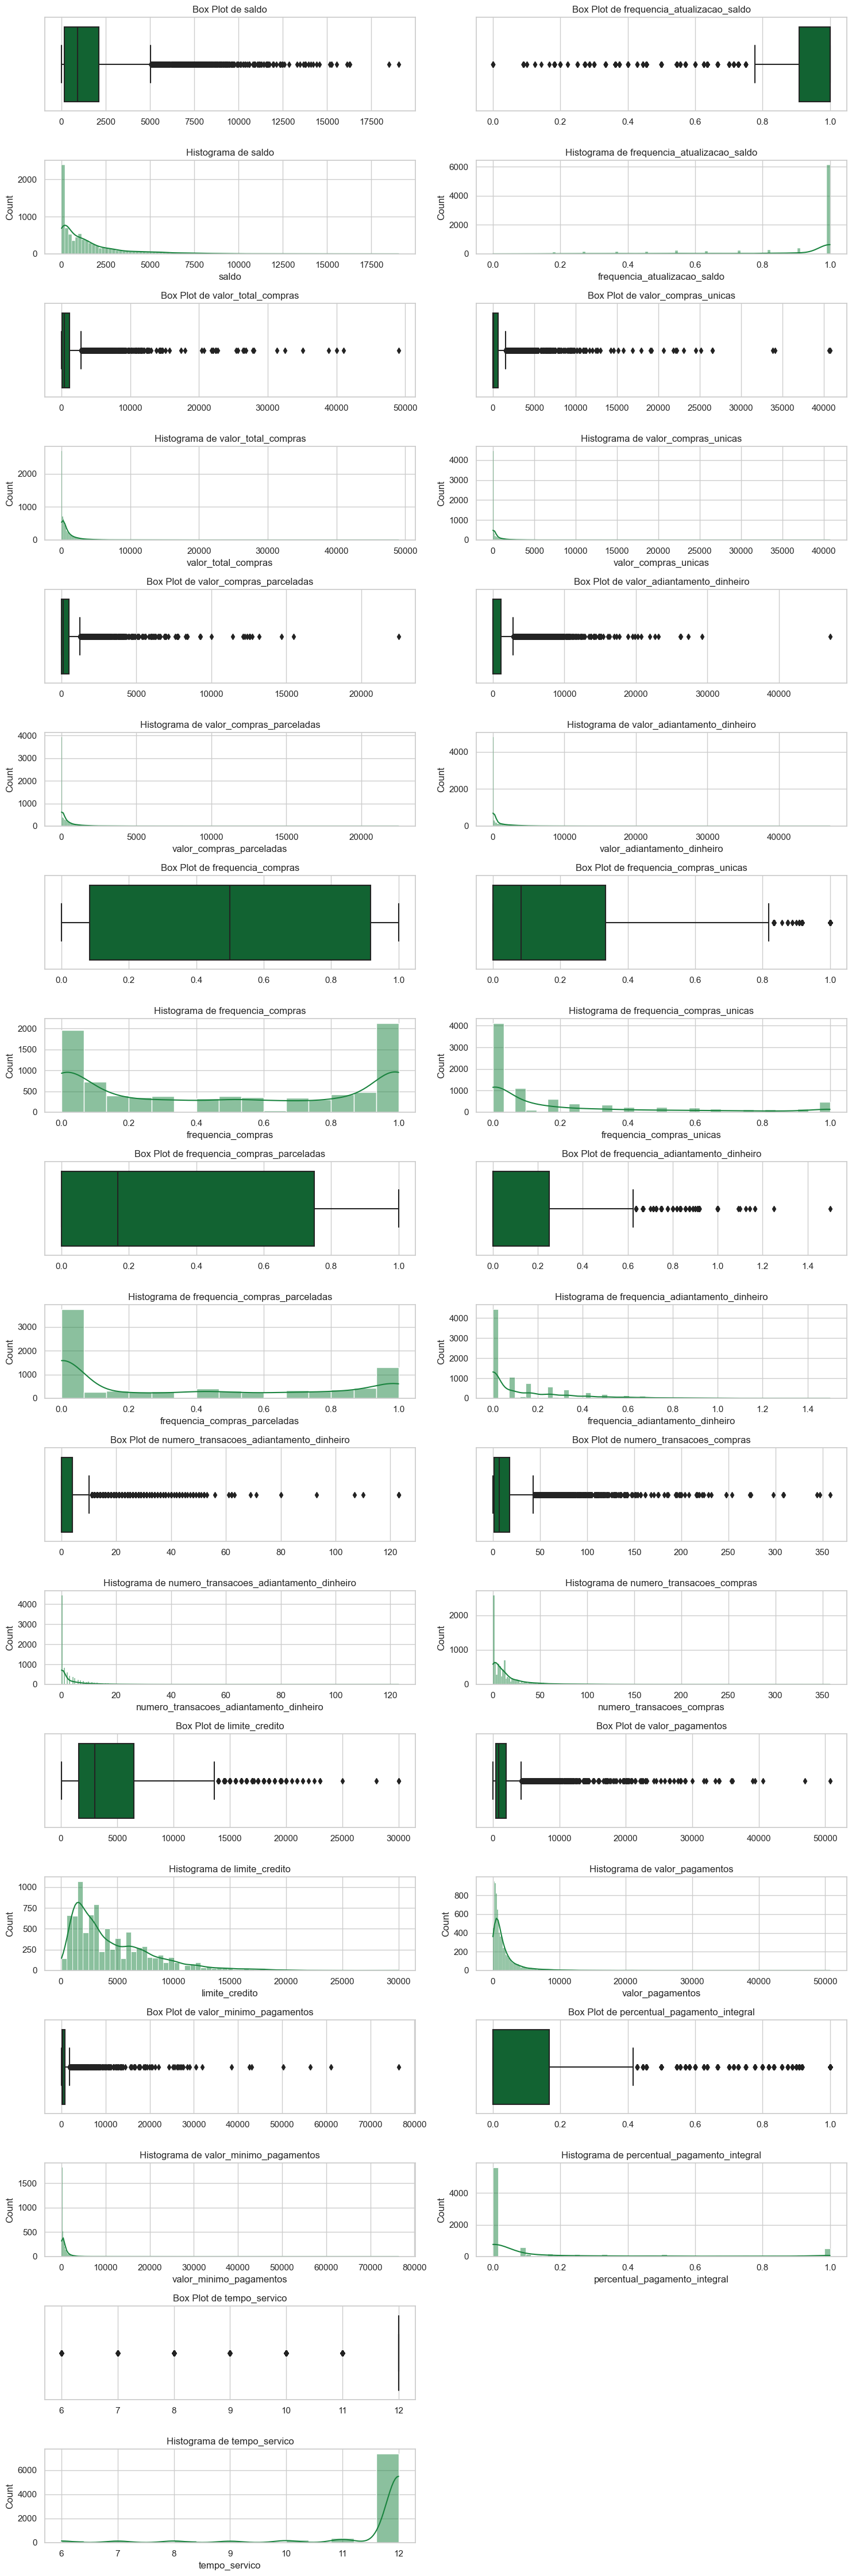

In [10]:
# Definindo a paleta de cores em tons de verde
green_palette_box = sns.color_palette("Greens_r")  # Paleta invertida para boxplots mais claros
green_palette_hist = sns.color_palette("Greens", as_cmap=True)  # Paleta normal para histogramas

# Selecionando as variáveis numéricas já processadas
colunas_numericas = df_numericas.columns

# Número de variáveis quantitativas
num_var = len(colunas_numericas)

# Determinando o número de linhas e colunas
num_cols = 2  # Dois gráficos por linha
num_rows = (num_var + num_cols - 1) // num_cols  # Calcula o número necessário de linhas, arredondado para cima

# Criando a figura e definindo o número de linhas e colunas para os subplots
fig, axes = plt.subplots(nrows=num_rows * 2, ncols=num_cols, figsize=(15, 5 * num_rows))  # Cada variável ocupa duas linhas

# Loop para plotar box plots e histogramas para cada variável numérica
for i, coluna in enumerate(colunas_numericas):
    row = (i // num_cols) * 2  # Encontra a linha base para o par de gráficos (boxplot e histograma)
    col = i % num_cols  # Encontra a coluna para o par de gráficos

    # Box plot na parte superior usando tons de verde
    sns.boxplot(data=df, x=coluna, ax=axes[row, col], orient='h', palette=green_palette_box)
    axes[row, col].set_title(f'Box Plot de {coluna}')
    axes[row, col].set_xlabel('')  # Limpar label de x se não necessário

    # Histograma diretamente abaixo do box plot, também em verde
    sns.histplot(df[coluna], kde=True, ax=axes[row + 1, col], color=green_palette_hist(200))
    axes[row + 1, col].set_title(f'Histograma de {coluna}')

# Removendo subplots vazios, se houver
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[(j // num_cols) * 2, j % num_cols])  # Remove o boxplot vazio
    fig.delaxes(axes[((j // num_cols) * 2) + 1, j % num_cols])  # Remove o histograma vazio

# Ajustando o layout para evitar sobreposição e melhorar a apresentação
plt.tight_layout()
plt.show()

---

#### 💡 Observações:

**Análise Gráfica das Variáveis Numéricas**:

- **Saldo Restante na Conta (`saldo`)**:
  - O boxplot mostra uma grande quantidade de outliers acima de **7.500**.
  - A distribuição é assimétrica positiva, com a maioria dos clientes possuindo saldos baixos e poucos com saldos elevados.

- **Frequência de Atualização do Saldo (`frequencia_atualizacao_saldo`)**:
  - A maior parte dos clientes possui frequência de atualização do saldo próxima de **1**, indicando que os saldos são frequentemente atualizados.
  - O histograma apresenta baixa dispersão, com valores concentrados próximos a **1**.

- **Valor Total de Compras (`valor_total_compras`)**:
  - A distribuição apresenta uma cauda longa, com a maioria dos clientes realizando compras de valores baixos.
  - O boxplot evidencia diversos outliers acima de **10.000**, indicando valores extremos no comportamento de consumo.

- **Valor de Compras Únicas (`valor_compras_unicas`)**:
  - Assim como o valor total de compras, a maioria dos clientes realiza compras únicas de valores baixos.
  - O boxplot destaca valores extremos superiores a **40.000**, indicando poucos casos de compras únicas de alto valor.

- **Valor de Compras Parceladas (`valor_compras_parceladas`)**:
  - A maioria dos valores está concentrada em **zero**, indicando que muitos clientes não realizam compras parceladas.
  - O histograma também reflete a concentração em valores baixos, com uma cauda longa. O boxplot apresenta outliers acima de **5.000**, mas eles são relativamente raros, indicando que compras parceladas altas não são uma característica predominante.

- **Adiantamento de Dinheiro (`valor_adiantamento_dinheiro`)**:
  - A distribuição é altamente assimétrica, com a maior parte dos clientes utilizando valores baixos ou nulos de adiantamento.
  - O boxplot revela outliers significativos acima de **10.000**, o que sugere clientes com comportamento atípico de utilização elevada de adiantamentos.

- **Frequência de Compras (`frequencia_compras`)**:
  - A distribuição é bimodal, com muitos clientes apresentando frequências próximas de **0** ou **1**, indicando dois grupos bem distintos: clientes que compram raramente e outros que compram frequentemente.

- **Número de Transações com Adiantamento de Dinheiro (`numero_transacoes_adiantamento_dinheiro`)**:
  - A maior parte dos clientes realiza poucas transações, com um pico próximo de **zero**.
  - Outliers notáveis acima de **50 transações** são observados no boxplot, indicando comportamentos fora do padrão.

- **Limite de Crédito (`limite_credito`)**:
  - A distribuição é assimétrica, com a maioria dos clientes concentrados em limites de até **10.000**.
  - O boxplot evidencia outliers significativos acima de **15.000**, indicando poucos clientes com limites excepcionalmente altos.

- **Valor Mínimo de Pagamentos (`valor_minimo_pagamentos`)**:
  - O histograma mostra uma alta concentração em valores baixos, com uma cauda longa que se estende até valores extremos.
  - Outliers notáveis acima de **50.000** são visíveis no boxplot, o que pode influenciar a análise.

- **Tempo de Serviço (`tempo_servico`)**:
  - Quase todos os clientes estão concentrados em **12 meses**, indicando que essa variável não possui grande variabilidade.
  - O boxplot reflete pouca dispersão, com a maioria dos valores agrupados.

**Conclusão**:
- A presença de **outliers** significativos em variáveis como `saldo`, `valor_total_compras`, e `valor_minimo_pagamentos` deve ser analisada com cuidado para evitar impacto negativo na clusterização.
- Variáveis como `tempo_servico` possuem baixa variabilidade e podem ter menor importância no processo de segmentação.
- Algumas variáveis, como `frequencia_compras`, apresentam padrões bimodais que podem ser importantes para identificar segmentos distintos de clientes.

---

### 5.2 Análise de Correlação <a id="5.2-análise-de-correlação"></a>
[Voltar à EDA](#5-análise-exploratória-de-dados-eda)

Nesta seção, investigaremos a correlação entre as variáveis numéricas do dataset. A análise de correlação nos permite identificar relações lineares entre as variáveis, o que é essencial para:

1. **Identificar Multicolinearidade**: Variáveis altamente correlacionadas podem conter informações redundantes e impactar algoritmos sensíveis à multicolinearidade.
2. **Entender Relações Entre Variáveis**: Detectar dependências ou padrões relevantes no comportamento dos clientes.
3. **Guiar a Seleção de Variáveis**: Focar em variáveis que sejam mais significativas para a segmentação e modelagem.

As etapas incluem:
- **Cálculo da Matriz de Correlação**: Utilizaremos o coeficiente de correlação de Pearson para medir a força e a direção das relações entre as variáveis numéricas.
- **Visualização com Mapa de Calor (Heatmap)**: Representaremos graficamente as correlações para facilitar a identificação de padrões e relações significativas.

Por fim, destacaremos as variáveis mais correlacionadas e discutiremos como essas relações podem influenciar as etapas subsequentes do projeto.

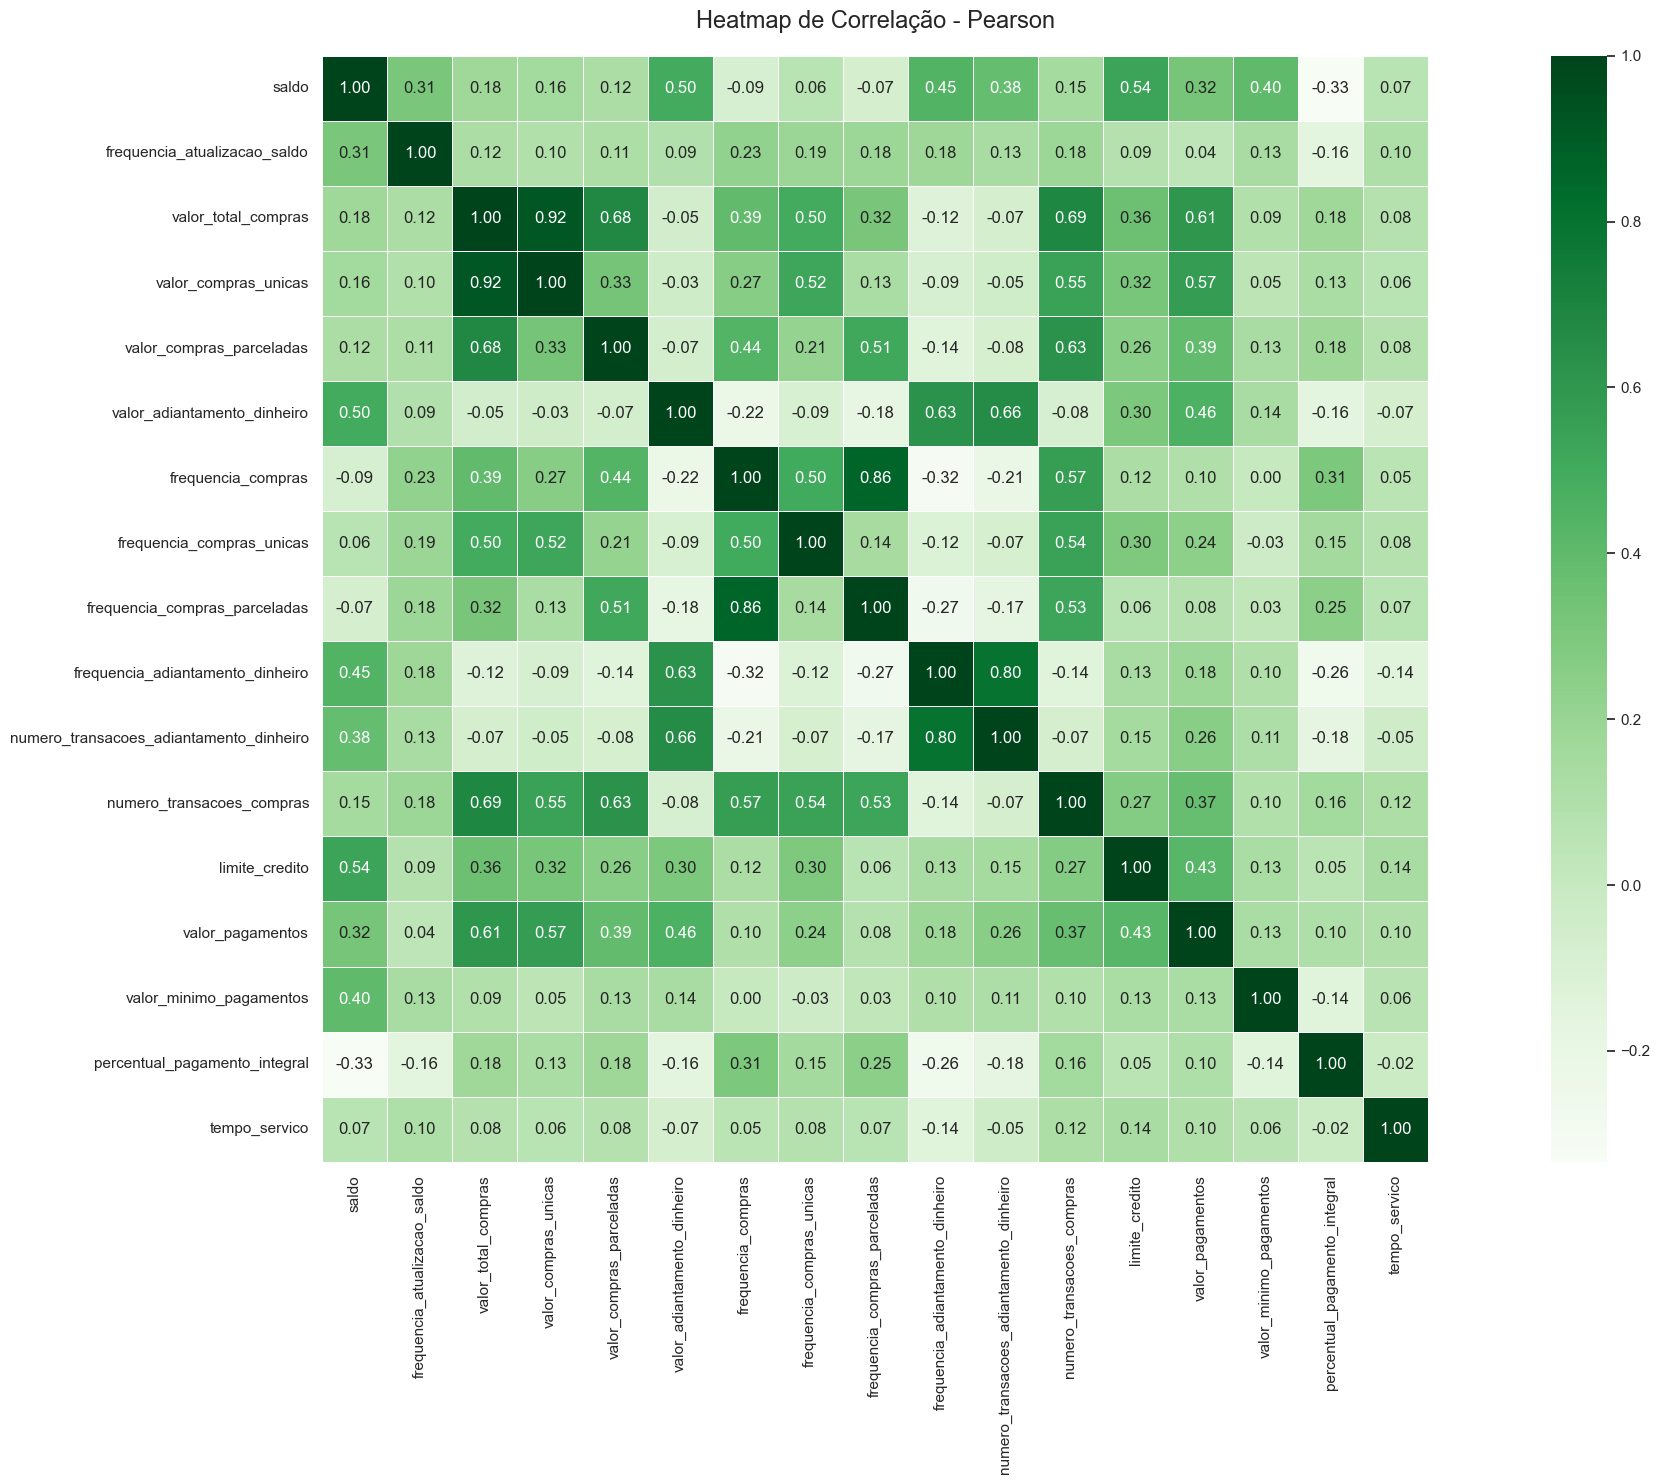

In [11]:
# Calculando a matriz de correlação com Pearson
matriz_correlacao = df_numericas.corr(method='pearson')

# Configurando o tamanho e estilo do gráfico
plt.figure(figsize=(25, 15))
sns.set(style="whitegrid")

# Criando o heatmap para a matriz de correlação
heatmap = sns.heatmap(
    matriz_correlacao,
    annot=True,  # Exibe os valores no heatmap
    fmt=".2f",  # Formato dos números
    cmap="Greens",  # Paleta de cores para o heatmap
    cbar=True,  # Adiciona barra de cores
    square=True,  # Mantém os quadrados simétricos
    linewidths=0.5,  # Espessura das linhas
)

# Títulos e ajustes
heatmap.set_title('Heatmap de Correlação - Pearson', fontsize=17, pad=20)
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X
plt.yticks(rotation=0)   # Mantém os rótulos do eixo Y na horizontal
plt.tight_layout()
plt.show()

In [12]:
# Definindo o limiar de correlação
limiar_correlacao = 0.6

# Calculando a matriz de correlação e transformando em formato longo
correlacoes_long = matriz_correlacao.unstack().reset_index()
correlacoes_long.columns = ['Variável 1', 'Variável 2', 'Correlação']

# Filtrando apenas as correlações acima do limiar, excluindo diagonais (self-correlation)
correlacoes_filtradas = correlacoes_long[
    (correlacoes_long['Correlação'].abs() >= limiar_correlacao) & 
    (correlacoes_long['Variável 1'] != correlacoes_long['Variável 2'])
]

# Ordenando pela força da correlação
correlacoes_filtradas = correlacoes_filtradas.sort_values(
    by='Correlação', key=lambda x: x.abs(), ascending=False
).reset_index(drop=True)

# Exibindo o DataFrame resultante
correlacoes_filtradas

,Variável 1,Variável 2,Correlação
0,valor_total_compras,valor_compras_unicas,0.916780
1,valor_compras_unicas,valor_total_compras,0.916780
2,frequencia_compras_parceladas,frequencia_compras,0.862338
3,frequencia_compras,frequencia_compras_parceladas,0.862338
4,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,0.799593
5,numero_transacoes_adiantamento_dinheiro,frequencia_adiantamento_dinheiro,0.799593
6,valor_total_compras,numero_transacoes_compras,0.688732
7,numero_transacoes_compras,valor_total_compras,0.688732
8,valor_compras_parceladas,valor_total_compras,0.679259
9,valor_total_compras,valor_compras_parceladas,0.679259


---

#### 💡 Observações:

**Análise de Correlação**:

- **Valor Total de Compras (`valor_total_compras`) e Compras Únicas (`valor_compras_unicas`)**:
  - Correlação de **0.92**, indicando que uma grande parte do valor total de compras é composta por compras únicas.
  - Esse comportamento sugere que muitos clientes preferem realizar transações maiores de forma esporádica, o que pode ser relevante para identificar clientes que priorizam compras específicas de alto valor.

- **Frequência de Compras Parceladas (`frequencia_compras_parceladas`) e Frequência Geral de Compras (`frequencia_compras`)**:
  - Correlação de **0.86**, mostrando que clientes que compram com frequência também realizam mais compras parceladas.
  - Esse padrão pode indicar que clientes com maior atividade financeira utilizam parcelamentos como estratégia de gerenciamento financeiro.

- **Frequência de Adiantamento de Dinheiro (`frequencia_adiantamento_dinheiro`) e Número de Transações com Adiantamento de Dinheiro (`numero_transacoes_adiantamento_dinheiro`)**:
  - Correlação de **0.80**, evidenciando que clientes que utilizam adiantamentos com frequência tendem a realizar mais transações nesse formato.
  - Isso sugere um perfil de cliente que pode estar em maior necessidade financeira ou utilizando adiantamentos como complemento à renda.

- **Valor Total de Compras (`valor_total_compras`) e Número de Transações de Compras (`numero_transacoes_compras`)**:
  - Correlação de **0.69**, indicando que um maior número de transações contribui para um valor total de compras mais alto.
  - Isso não significa que cada transação seja de alto valor, mas sim que clientes ativos em número de compras tendem a gastar mais.

- **Valor de Compras Parceladas (`valor_compras_parceladas`) e Valor Total de Compras (`valor_total_compras`)**:
  - Correlação de **0.68**, destacando a relevância das compras parceladas no total de compras.
  - Esse padrão pode ser explorado com ofertas promocionais para incentivar o uso de parcelamentos.

- **Valor de Adiantamento de Dinheiro (`valor_adiantamento_dinheiro`) com Número e Frequência de Transações de Adiantamento**:
  - Correlações de **0.66** e **0.63**, respectivamente.
  - Clientes que utilizam adiantamentos com frequência geralmente realizam transações maiores, o que pode indicar uma dependência financeira dessa funcionalidade.

- **Valor de Pagamentos (`valor_pagamentos`) e Valor Total de Compras (`valor_total_compras`)**:
  - Correlação de **0.61**, mostrando que clientes que gastam mais também tendem a realizar pagamentos maiores.
  - Isso pode refletir um bom comportamento financeiro, sendo um grupo de interesse para estratégias premium.

---

#### Conclusão:
- As correlações mais fortes ajudam a identificar grupos de clientes com comportamentos financeiros específicos, como:
  - Clientes que preferem compras únicas de alto valor.
  - Clientes que utilizam frequentemente parcelamentos e adiantamentos.
- Esses insights são importantes para direcionar as estratégias de segmentação e definir ofertas personalizadas.
- Algumas variáveis com baixa correlação, como `tempo_servico`, podem ter menor influência no processo de clusterização.

---

### 5.3 Análise de Outliers <a id="5.3-análise-de-outliers"></a>  
[Voltar à EDA](#5-análise-exploratória-de-dados-eda)

Nesta seção, realizaremos uma análise detalhada dos outliers presentes nas variáveis quantitativas. Outliers são valores que se afastam significativamente da distribuição central dos dados e podem impactar a qualidade da clusterização, dependendo de sua natureza e causa.

As etapas desta análise incluem:

1. **Identificação de Outliers**:  
   Utilizamos o método do **Intervalo Interquartil (IQR)** para identificar valores extremos em cada variável. O IQR é calculado como a diferença entre o 3º quartil (Q3) e o 1º quartil (Q1). Os limites inferior e superior para detecção de outliers são dados por:
   - Limite inferior: \( Q1 - 1.5 \times IQR \)
   - Limite superior: \( Q3 + 1.5 \times IQR \)

2. **Quantificação de Outliers por Variável**:  
   Geramos uma tabela para destacar o número e a proporção de outliers em relação ao total de registros para cada variável quantitativa.

3. **Impacto dos Outliers**:  
   Discutimos as variáveis com maior proporção de outliers, avaliando se esses valores extremos são representativos de comportamentos reais ou se podem distorcer os resultados da clusterização.

In [13]:
# Inicializando um dicionário para armazenar a quantidade de outliers para cada variável
outliers_info = {}

# Calculando os limites e contagem de outliers para cada variável quantitativa
for coluna in df_numericas.columns:
    # Calculando Q1, Q3 e IQR
    Q1 = df_numericas[coluna].quantile(0.25)
    Q3 = df_numericas[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Contando os outliers abaixo e acima dos limites
    outliers_abaixo = (df_numericas[coluna] < limite_inferior).sum()
    outliers_acima = (df_numericas[coluna] > limite_superior).sum()
    total_outliers = outliers_abaixo + outliers_acima

    # Armazenando os resultados no dicionário
    outliers_info[coluna] = {
        'Outliers Abaixo': outliers_abaixo,
        'Outliers Acima': outliers_acima,
        'Total de Outliers': total_outliers,
        'Percentual de Outliers (%)': (total_outliers / df_numericas.shape[0]) * 100
    }

# Convertendo o dicionário para um DataFrame para melhor visualização
tabela_outliers = pd.DataFrame(outliers_info).T

# Ordenando a tabela pelo percentual de outliers em ordem decrescente
tabela_outliers = tabela_outliers.sort_values(by='Percentual de Outliers (%)', ascending=False)

# Exibindo a tabela de frequência de outliers
tabela_outliers

,Outliers Abaixo,Outliers Acima,Total de Outliers,Percentual de Outliers (%)
frequencia_atualizacao_saldo,1511.0,0.0,1511.0,17.496526
percentual_pagamento_integral,0.0,1343.0,1343.0,15.551181
tempo_servico,1290.0,0.0,1290.0,14.937471
valor_adiantamento_dinheiro,0.0,977.0,977.0,11.313108
valor_compras_unicas,0.0,961.0,961.0,11.127837
valor_minimo_pagamentos,0.0,841.0,841.0,9.738305
valor_compras_parceladas,0.0,811.0,811.0,9.390922
numero_transacoes_adiantamento_dinheiro,0.0,794.0,794.0,9.194071
valor_pagamentos,0.0,785.0,785.0,9.089856
valor_total_compras,0.0,768.0,768.0,8.893006


In [14]:
# Calculando os limites inferior e superior de outliers para cada variável quantitativa
faixas_outliers = {}

for coluna in df_numericas.columns:
    # Calculando Q1, Q3 e IQR
    Q1 = df_numericas[coluna].quantile(0.25)
    Q3 = df_numericas[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Armazenando os limites e valores estatísticos
    faixas_outliers[coluna] = {
        'Q1': Q1,
        'Q3': Q3,
        'Limite Inferior': limite_inferior,
        'Limite Superior': limite_superior,
        'Mínimo': df_numericas[coluna].min(),
        'Máximo': df_numericas[coluna].max()
    }

# Convertendo o dicionário para DataFrame para visualização
df_faixas_outliers = pd.DataFrame(faixas_outliers).T

# Exibindo a faixa de valores dos outliers
df_faixas_outliers

,Q1,Q3,Limite Inferior,Limite Superior,Mínimo,Máximo
saldo,148.095189,2105.195853,-2787.555807,5040.846849,0.000000,19043.13856
frequencia_atualizacao_saldo,0.909091,1.000000,0.772728,1.136364,0.000000,1.00000
valor_total_compras,43.367500,1145.980000,-1610.551250,2799.898750,0.000000,49039.57000
valor_compras_unicas,0.000000,599.100000,-898.650000,1497.750000,0.000000,40761.25000
valor_compras_parceladas,0.000000,484.147500,-726.221250,1210.368750,0.000000,22500.00000
valor_adiantamento_dinheiro,0.000000,1132.385490,-1698.578235,2830.963725,0.000000,47137.21176
frequencia_compras,0.083333,0.916667,-1.166668,2.166668,0.000000,1.00000
frequencia_compras_unicas,0.000000,0.333333,-0.499999,0.833333,0.000000,1.00000
frequencia_compras_parceladas,0.000000,0.750000,-1.125000,1.875000,0.000000,1.00000
frequencia_adiantamento_dinheiro,0.000000,0.250000,-0.375000,0.625000,0.000000,1.50000


---

#### 💡 **Observações**:

**1. Frequência de Atualização do Saldo (`frequencia_atualizacao_saldo`)**:
- **Outliers Abaixo**: 17,5% dos registros (1.511 clientes) apresentam frequências significativamente menores que o intervalo normal. Este comportamento pode indicar clientes com baixa movimentação na conta ou irregularidade no uso.
- **Impacto no Negócio**: Esses clientes podem ser menos engajados com o serviço, representando um segmento de baixo uso.

**2. Percentual de Pagamento Integral (`percentual_pagamento_integral`)**:
- **Outliers Acima**: 15,6% dos registros indicam clientes com percentuais muito altos de pagamento integral.
- **Impacto no Negócio**: Esses valores podem ser clientes de menor risco financeiro, pois pagam o saldo total frequentemente. Outliers aqui podem ser positivos.

**3. Tempo de Serviço (`tempo_servico`)**:
- **Outliers Abaixo**: 14,9% dos registros indicam clientes com tempo de serviço inferior ao limite inferior (6 meses).
- **Impacto no Negócio**: Clientes com pouco tempo de serviço podem ser novos e ainda não apresentaram um histórico robusto para análises.

**4. Adiantamento de Dinheiro (`valor_adiantamento_dinheiro`)**:
- **Outliers Acima**: 11,3% dos clientes apresentam valores muito elevados de adiantamento de dinheiro.
- **Impacto no Negócio**: Clientes que utilizam frequentemente o adiantamento de dinheiro podem representar maior lucratividade, mas também maior risco.

**5. Compras Únicas (`valor_compras_unicas`)**:
- **Outliers Acima**: 11,1% dos clientes realizam compras únicas de valores consideravelmente elevados.
- **Impacto no Negócio**: Estes clientes podem ser um segmento de alto valor, mas os valores extremos podem influenciar a análise de clusterização.

**6. Compras Parceladas (`valor_compras_parceladas`)**:
- **Outliers Acima**: 9,9% dos clientes realizam compras parceladas de valores extremamente altos.
- **Impacto no Negócio**: Este comportamento sugere um segmento que pode ser mais propenso a financiar compras, relevante para estratégias de crédito.

**7. Limite de Crédito (`limite_credito`)**:
- **Outliers Acima**: Apenas 2,8% dos clientes apresentam limites de crédito extremamente elevados.
- **Impacto no Negócio**: Embora raros, esses clientes podem ser prioritários para estratégias exclusivas, como produtos premium.

**8. Tempo de Serviço (`tempo_servico`)**:
- **Baixa Variabilidade**: Os outliers estão concentrados abaixo de 6 meses, reforçando que poucos clientes possuem um tempo de uso atípico.
- **Impacto no Negócio**: Esse dado pode influenciar pouco na segmentação, pois a maioria dos clientes tem um tempo de serviço homogêneo.

---

#### Discussão:

- **Presença de Outliers Significativos**: As variáveis relacionadas a valores financeiros (`valor_compras_unicas`, `valor_compras_parceladas`, `valor_pagamentos`) e limites de crédito apresentam uma proporção notável de outliers. Esses valores podem ser legítimos e representar comportamentos atípicos mas importantes no negócio.

- **Ação Sobre Outliers**:
  1. **Manter Outliers Positivos**: Variáveis como `valor_compras_unicas` e `percentual_pagamento_integral` podem trazer informações sobre clientes de alto valor e baixo risco.
  2. **Tratar Outliers Negativos**: Valores baixos em `frequencia_atualizacao_saldo` e `tempo_servico` podem indicar perfis desengajados ou novos, requerendo ajustes para não influenciar negativamente os modelos.
  3. **Avaliar Segmentos Específicos**: É possível criar grupos segmentados para clientes com uso elevado de adiantamento e limites de crédito, focando em estratégias personalizadas.

- **Próximos Passos**:
  - Decidir entre remoção, transformação (log ou winsorização) ou manutenção dos outliers com base no impacto observado.
  - Verificar a influência dos outliers nos resultados da clusterização, evitando viés excessivo no agrupamento.

---

---

#### 💡 Decisão Sobre os Outliers:

Com base na análise realizada, decidimos **manter os outliers na base de dados** neste momento, por mais que representem valores extremos. Essa decisão se baseia no seguinte raciocínio:

- **Contexto de Negócio**:
  - Os outliers podem refletir comportamentos específicos de segmentos importantes de clientes, como clientes de alto valor ou clientes com uso atípico do cartão de crédito.
  - Removê-los neste estágio poderia comprometer a interpretação dos clusters e a identificação de padrões de comportamento relevantes.

- **Próximos Passos**:
  - Verificar o impacto dos outliers nos resultados ao rodar os estimadores de clusterização.
  - Caso os outliers prejudiquem a formação ou interpretação dos clusters, retornaremos a esta etapa para realizar transformações ou exclusões específicas.

Esta abordagem mantém os dados o mais completo possível, permitindo uma análise inicial mais abrangente.

---

### 5.4 Conclusões da EDA <a id="5.4-conclusões-da-eda"></a>
[Voltar à EDA](#5-análise-exploratória-de-dados-eda)

---

Após realizar a Análise Exploratória de Dados (EDA), chegamos às seguintes conclusões e constatações relevantes para o projeto:

#### 💡 Características Gerais das Variáveis:

1. **Natureza Predominantemente Numérica**:
   - A maior parte das variáveis no dataset é quantitativa e está relacionada a comportamentos financeiros dos clientes, como gastos, pagamentos e limites de crédito. Isso reforça a importância de entender a distribuição e as relações entre essas variáveis para segmentar adequadamente os clientes.

2. **Presença de Outliers**:
   - Diversas variáveis apresentam outliers significativos, como `valor_total_compras`, `valor_adiantamento_dinheiro` e `limite_credito`. Esses outliers podem representar comportamentos específicos de clientes, como usuários de alto gasto ou uso atípico do cartão. Optamos por mantê-los para preservar a integridade do comportamento real dos clientes.

3. **Distribuição Assimétrica**:
   - Variáveis como `saldo` e `valor_pagamentos` têm distribuições assimétricas positivas, o que indica que a maioria dos clientes possui valores baixos, enquanto poucos têm valores muito altos. Essa característica será importante ao identificar clusters de clientes diferenciados.

#### 💡 Relações Entre Variáveis:

4. **Alta Correlação em Variáveis de Compras**:
   - As variáveis `valor_total_compras`, `valor_compras_unicas` e `valor_compras_parceladas` apresentam correlações muito altas entre si, indicando que essas medidas estão fortemente relacionadas e capturam comportamentos semelhantes.

5. **Uso de Adiantamentos**:
   - Há uma forte relação entre `frequencia_adiantamento_dinheiro` e `numero_transacoes_adiantamento_dinheiro`, bem como com `valor_adiantamento_dinheiro`. Isso sugere que clientes que realizam transações frequentes de adiantamento tendem a movimentar valores altos. Esse comportamento pode identificar clientes em situações financeiras mais críticas ou com padrões de uso específicos.

6. **Comportamentos de Pagamento**:
   - Variáveis como `valor_minimo_pagamentos` e `percentual_pagamento_integral` destacam comportamentos financeiros distintos, como clientes que realizam pagamentos mínimos ou integram totalmente suas dívidas.

#### 💡 Implicações para o Negócio:

7. **Segmentação Relevante**:
   - As diferenças claras nos padrões de compras, pagamentos e limites de crédito indicam que existem grupos de clientes com comportamentos bem distintos. Esses padrões podem ser explorados na próxima etapa de clusterização para criar segmentos que permitam estratégias de marketing direcionadas.

8. **Uso Estratégico dos Outliers**:
   - Apesar de serem valores extremos, os outliers podem representar clientes de alto valor ou comportamentos atípicos que merecem atenção especial. Por isso, manteremos esses dados na análise inicial.

9. **Variáveis Potencialmente Redundantes**:
   - As altas correlações observadas entre algumas variáveis, como as relacionadas a compras, podem indicar redundância. Esse fator será avaliado durante a clusterização para evitar sobreposição de informações.

---

Estas conclusões fundamentam a próxima etapa do projeto, que será focada na segmentação dos clientes por meio de algoritmos de clusterização. A análise conduzida até aqui fornece uma base sólida para entender as características e comportamentos que definirão os clusters.

## 6. Análise de Segmentação (Clusterização) <a id="6-análise-de-segmentação-clusterização"></a>  
[Voltar ao Sumário](#sumário)  

Nesta seção, realizamos a análise de segmentação dos clientes utilizando técnicas de clusterização. O objetivo é identificar grupos distintos de clientes com características e comportamentos semelhantes, fornecendo insights valiosos para personalização de estratégias de marketing e melhorias no relacionamento com os clientes.

Após preparar os dados por meio do pré-processamento, aplicamos o **Teste de Hopkins** para avaliar a tendência de formação de clusters. Esse teste estatístico valida se há evidências significativas de estrutura de cluster nos dados, justificando a aplicação de algoritmos como K-Means e DBSCAN.

### [6.1 Contexto e Objetivo da Segmentação](#6.1-contexto-e-objetivo-da-segmentação)  
Definimos o objetivo principal da clusterização, explicando como a segmentação dos clientes pode ser usada para gerar valor ao negócio. Exploramos como os clusters podem destacar padrões de comportamento, como uso de crédito, adiantamentos e frequência de compras.  

### [6.2 Pré-Processamento para Clusterização](#6.2-pré-processamento-para-clusterização)  
Preparamos os dados para a clusterização, garantindo que estejam normalizados e otimizados para os algoritmos. Removemos variáveis redundantes, verificamos alta correlação e consideramos a aplicação de redução de dimensionalidade, como PCA.  

### [6.3 Teste de Tendência de Agrupamento (Teste de Hopkins)](#6.3-teste-de-tendência-de-agrupamento-teste-de-hopkins)  
Realizamos o **Teste de Hopkins** para determinar se os dados apresentam uma estrutura de cluster significativa. Esse teste verifica se os dados seguem uma distribuição uniforme ou se há evidências de agrupamento, indicando a adequação de métodos de clusterização.  

### [6.4 Determinação do Número de Clusters](#6.4-determinação-do-número-de-clusters)  
Utilizamos métricas e métodos como o Elbow Method, Silhouette Score e Calinski-Harabasz Index para determinar o número ideal de clusters, justificando nossa escolha com base em visualizações e valores obtidos.  

### [6.5 Aplicação de Algoritmos de Clusterização](#6.5-aplicação-de-algoritmos-de-clusterização)  
Aplicamos diferentes algoritmos de clusterização, como K-Means, Hierarchical Clustering e DBSCAN, para identificar padrões distintos e avaliar a melhor abordagem para o problema.  

### [6.6 Interpretação dos Clusters](#6.6-interpretação-dos-clusters)  
Interpretamos os clusters gerados, descrevendo o perfil de cada grupo com base em variáveis-chave. Utilizamos visualizações como gráficos de barras e boxplots para destacar as características mais relevantes de cada segmento.  

### [6.7 Discussão e Estratégias de Negócio](#6.7-discussão-e-estratégias-de-negócio)  
Discutimos os insights obtidos com os clusters e propomos estratégias práticas para o negócio, como campanhas de marketing direcionadas e ações de retenção. Avaliamos a necessidade de ajustes nos clusters ou aprofundamento em etapas futuras.  

---

### 6.1 Contexto e Objetivo da Segmentação <a id="6.1-contexto-e-objetivo-da-segmentação"></a>
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Nesta seção, apresentamos o contexto do negócio e os objetivos gerais da clusterização no dataset de clientes de cartão de crédito. A clusterização foi aplicada para identificar padrões de comportamento entre os clientes, proporcionando insights valiosos para personalizar estratégias de marketing, melhorar o atendimento ao cliente e maximizar o valor dos clientes para a empresa.

#### Contexto do Negócio:
O mercado de cartões de crédito é altamente competitivo, exigindo uma compreensão aprofundada do comportamento dos clientes para garantir retenção e engajamento. A segmentação com base em dados permite:
- **Personalizar campanhas de marketing**: Oferecer produtos, benefícios e incentivos alinhados às necessidades e preferências de cada grupo.
- **Aumentar a satisfação e retenção do cliente**: Adaptar as estratégias para atender às expectativas e necessidades específicas de cada segmento.
- **Otimizar investimentos**: Direcionar recursos de marketing e atendimento para os grupos mais estratégicos, maximizando o retorno sobre o investimento.

#### Objetivo Geral:
O objetivo da clusterização neste projeto foi identificar grupos distintos de clientes com padrões semelhantes de comportamento financeiro e de consumo. Esses grupos servirão como base para:
- **Estratégias direcionadas**: Desenvolver campanhas personalizadas com base em características como saldo, frequência de compras, uso de crédito ou adiantamentos.
- **Retenção e engajamento**: Propor ações específicas para reter clientes menos engajados ou com menor atividade financeira.
- **Identificação de oportunidades**: Descobrir nichos de mercado ou padrões inusitados que possam ser explorados em estratégias futuras.

#### Expectativas Refinadas:
Com base nas análises realizadas, identificamos que a clusterização pode explorar e refinar as seguintes hipóteses:
- Grupos com alto saldo e frequência de compras moderada, ideais para estratégias de fidelização.
- Clientes que utilizam crédito extensivamente, com baixo percentual de pagamentos integrais.
- Segmentos com baixo saldo e atividade financeira limitada, demandando estratégias de reengajamento.
- Clusters de alto valor financeiro, com potencial para programas exclusivos e personalizados.

#### Estratégias e Impactos Esperados:
Os insights provenientes dos clusters deverão ser aplicados para:
- **Campanhas específicas**: Desenvolver ações específicas para clusters de clientes premium, clientes menos engajados e clientes emergentes.
- **Foco em retenção**: Identificar padrões de desengajamento e atuar preventivamente em grupos com maior risco de churn.
- **Ações práticas**: Maximizar o retorno financeiro por meio de estratégias baseadas em comportamento real dos clientes, garantindo decisões mais assertivas.

---

### **6.2 Pré-Processamento para Clusterização 🔄** <a id="6.2-pré-processamento-para-clusterização"></a>  
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)  

Nesta etapa, preparamos os dados para a aplicação dos algoritmos de clusterização, garantindo que estejam ajustados às necessidades do modelo. O pré-processamento focou na seleção manual de variáveis, remoção de redundâncias e normalização para otimizar a formação de clusters coesos e interpretáveis.

As etapas incluem:

1. **Seleção Manual de Variáveis Relevantes**:  
   - Excluímos variáveis que não contribuem diretamente para a análise de comportamento, como identificadores únicos, que não possuem relação com padrões.  
     - **Exemplo**: Removemos `id_cliente` por ser apenas um identificador.  
   - Removemos variáveis consideradas redundantes com base no contexto de negócio e na análise exploratória de dados.  
     - **Exemplo**:  
       - `valor_compras_parceladas` foi excluída por ser fortemente correlacionada com `valor_total_compras`.  
       - `frequencia_compras_parceladas` foi excluída por ser redundante com `frequencia_compras`.  
   - A seleção foi realizada com base no entendimento do negócio, priorizando a preservação de variáveis interpretáveis e relevantes para a clusterização.

2. **Normalização ou Padronização**:  
   - Garantimos que todas as variáveis estivessem na mesma escala, utilizando o **StandardScaler** para padronizar os dados.  
   - Isso evitou que variáveis com magnitudes maiores dominassem o processo de clusterização, garantindo que todas as variáveis tivessem o mesmo peso.

3. **Ausência de Técnicas de Redução de Dimensionalidade**:  
   - Optamos por **não utilizar PCA (Principal Component Analysis)** nesta análise.  
   - Essa decisão foi baseada na necessidade de manter as variáveis originais e sua representatividade no contexto de negócios, facilitando a interpretação prática dos clusters formados.

O pré-processamento foi ajustado para equilibrar a robustez estatística dos modelos e a interpretabilidade prática no cenário empresarial, garantindo que os clusters identificados possam ser utilizados diretamente em estratégias de negócios.

---

In [15]:
# ---------------------------------------------------------------
# Etapa 1: Seleção de Variáveis Importantes para a Clusterização
# ---------------------------------------------------------------

# Justificativa:
# - Selecionar variáveis relevantes para clusterização com base no entendimento do negócio.
# - Remover variáveis redundantes ou pouco úteis sem automatizar completamente o processo.

# 1. Excluir colunas não relevantes (como identificadores únicos)
# Identificadores únicos não contribuem para a análise de clusterização, pois não possuem relação com padrões.
df_clusterizacao = df.drop(columns=['id_cliente'])

# 2. Remover variáveis redundantes baseadas no contexto de negócio
# Decisão: Variáveis que trazem informações redundantes em relação a outras serão removidas.
# Exemplo:
# - 'valor_compras_parceladas' é fortemente correlacionada a 'valor_total_compras'.
# - 'frequencia_compras_parceladas' é redundante com 'frequencia_compras'.
variaveis_excluir = [
    'valor_compras_parceladas',  # Redundante com valor_total_compras
    'frequencia_compras_parceladas'  # Redundante com frequencia_compras
]

df_clusterizacao = df_clusterizacao.drop(columns=variaveis_excluir)

# Verificar as dimensões e colunas disponíveis após exclusões manuais
print("Dimensões antes das exclusões manuais:", df.shape)
print("Colunas disponíveis após exclusões manuais:", list(df.columns))

# Verificar as dimensões finais do DataFrame selecionado
print("\nDimensões finais do DataFrame para clusterização:", df_clusterizacao.shape)

# Exibir as primeiras linhas do DataFrame resultante
df_clusterizacao.head()

Dimensões antes das exclusões manuais: (8636, 18)
Colunas disponíveis após exclusões manuais: ['id_cliente', 'saldo', 'frequencia_atualizacao_saldo', 'valor_total_compras', 'valor_compras_unicas', 'valor_compras_parceladas', 'valor_adiantamento_dinheiro', 'frequencia_compras', 'frequencia_compras_unicas', 'frequencia_compras_parceladas', 'frequencia_adiantamento_dinheiro', 'numero_transacoes_adiantamento_dinheiro', 'numero_transacoes_compras', 'limite_credito', 'valor_pagamentos', 'valor_minimo_pagamentos', 'percentual_pagamento_integral', 'tempo_servico']

Dimensões finais do DataFrame para clusterização: (8636, 15)


,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico
0,40.900749,0.818182,95.40,0.00,0.000000,0.166667,0.000000,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.000000,1.000000,1.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.000000,0.083333,0.083333,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,0.000000,0.666667,0.000000,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [16]:
# ----------------------------------------
# Etapa 2: Normalização dos Dados
# ----------------------------------------

# Justificativa:
# - A normalização garante que todas as variáveis tenham o mesmo peso no cálculo das distâncias.
# - Sem a normalização, variáveis com valores maiores podem dominar o processo de clusterização.

# Inicializando o StandardScaler para padronizar os dados
scaler = StandardScaler()

# Aplicando a normalização apenas às variáveis selecionadas da Etapa 1
dados_normalizados = scaler.fit_transform(df_clusterizacao)

# Convertendo o resultado de volta para um DataFrame com os mesmos nomes de colunas
df_normalizado = pd.DataFrame(dados_normalizados, columns=df_clusterizacao.columns)

# Exibindo as primeiras linhas do DataFrame após a normalização
print("Primeiras linhas do DataFrame após a normalização:")
print(df_normalizado.head())

# Salvando o DataFrame normalizado para uso em etapas futuras
df_pronto_clusterizacao = df_normalizado.copy()

# Verificando as estatísticas descritivas para confirmar a normalização
print("\nEstatísticas descritivas do DataFrame normalizado:")
df_normalizado.describe()

Primeiras linhas do DataFrame após a normalização:
      saldo  frequencia_atualizacao_saldo  valor_total_compras  \
0 -0.744625                     -0.370047            -0.429184   
1  0.764152                      0.067679            -0.473208   
2  0.426602                      0.505405            -0.116413   
3 -0.373910                      0.505405            -0.465825   
4  0.099551                      0.505405             0.142062   

   valor_compras_unicas  valor_adiantamento_dinheiro  frequencia_compras  \
0             -0.359160                    -0.468655           -0.820769   
1             -0.359160                     2.568556           -1.236139   
2              0.099909                    -0.468655            1.256077   
3             -0.349660                    -0.468655           -1.028455   
4             -0.359160                    -0.468655            0.425339   

   frequencia_compras_unicas  frequencia_adiantamento_dinheiro  \
0                  -0.686280 

,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico
count,8636.000000,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,0.000000,-3.422716e-16,1.151876e-17,-3.291073e-17,-4.278395e-17,6.582147e-18,-3.291073e-18,2.468305e-17,2.715136e-17,-1.151876e-17,1.118965e-16,-2.632859e-17,-4.442949e-17,5.923932e-17,9.215005e-17
std,1.000058,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-0.764144,-4.309583e+00,-4.732082e-01,-3.591603e-01,-4.686555e-01,-1.236139e+00,-6.862796e-01,-6.819525e-01,-4.794369e-01,-5.970542e-01,-1.222207e+00,-6.132812e-01,-3.643042e-01,-5.377269e-01,-4.221800e+00
25%,-0.693469,6.767893e-02,-4.531953e-01,-3.591603e-01,-4.686555e-01,-1.028455e+00,-6.862796e-01,-6.819525e-01,-4.794369e-01,-5.573385e-01,-7.985975e-01,-4.694457e-01,-2.930083e-01,-5.377269e-01,3.551807e-01
50%,-0.326598,5.054046e-01,-2.999696e-01,-3.324445e-01,-4.686555e-01,9.968862e-03,-4.085365e-01,-6.819525e-01,-4.794369e-01,-3.190448e-01,-4.159823e-01,-3.051243e-01,-2.326108e-01,-5.377269e-01,3.551807e-01
75%,0.240507,5.054046e-01,5.562856e-02,-3.444604e-03,6.515234e-02,1.048393e+00,4.246962e-01,5.570222e-01,9.925796e-02,1.178270e-01,5.405558e-01,5.727990e-02,-1.635812e-02,2.485496e-02,3.551807e-01
max,8.323708,5.054046e-01,2.215714e+01,2.384284e+01,2.175188e+01,1.256077e+00,2.646651e+00,6.751896e+00,1.731543e+01,1.362114e+01,6.963026e+00,1.681891e+01,3.184159e+01,2.837758e+00,3.551807e-01


#### 💡 **Observações:**

#### **1. Seleção de Variáveis**:
- Excluímos a variável `id_cliente`, que não é relevante para a análise de comportamento.
- Após análise de redundâncias e contexto de negócios:
  - Removemos `valor_compras_parceladas`, pois é redundante com `valor_total_compras`.
  - Removemos `frequencia_compras_parceladas`, pois é redundante com `frequencia_compras`.
- Mantivemos variáveis-chave como `saldo`, `frequencia_compras`, e `valor_total_compras`, que têm impacto direto no comportamento e podem diferenciar os clusters.
- **Dimensões finais após seleção e remoção de redundâncias**: **15 variáveis**.

#### **2. Normalização**:
- Todas as variáveis quantitativas foram padronizadas com o `StandardScaler`:
  - Média ajustada para 0.
  - Desvio padrão ajustado para 1.
- **Motivação**:
  - Evitar que variáveis com maior magnitude (ex.: `saldo`) dominem a formação dos clusters.
  - Garantir igualdade no impacto de todas as variáveis durante a clusterização.
- A normalização assegura que os cálculos de distância para formação de clusters sejam justos, especialmente em algoritmos como o K-Means.

#### **3. Observações Gerais**:
- **Interpretação Direta das Variáveis**:
  - Optamos por não aplicar técnicas de redução de dimensionalidade como PCA, para manter a capacidade de interpretar os clusters diretamente com as variáveis originais.
  - Essa abordagem facilita a identificação de padrões acionáveis no contexto de negócios.
- **Impacto no Negócio**:
  - As escolhas feitas na seleção de variáveis e na normalização foram guiadas pelo objetivo de identificar padrões claros e diretamente utilizáveis nas estratégias.

---

### **Próximos Passos**:
1. Realizar o **Teste de Hopkins** para avaliar a tendência de agrupamento nos dados normalizados, garantindo que a aplicação de algoritmos de clusterização seja apropriada.
2. Determinar o número ideal de clusters com base em métricas como:
   - **Silhouette Score**
   - **Davies-Bouldin Index**
   - **Calinski-Harabasz Index**
3. Implementar algoritmos de clusterização, como **K-Means**.

---


### 6.3 Teste de Tendência de Agrupamento (Teste de Hopkins) <a id="6.3-teste-de-tendência-de-agrupamento-teste-de-hopkins"></a>  
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)  

Após o pré-processamento e a normalização dos dados, realizamos o **Teste de Hopkins**, uma técnica estatística que avalia a tendência de formação de clusters em um conjunto de dados. O teste compara a distribuição dos dados reais com uma distribuição uniforme aleatória para determinar se há uma estrutura de cluster significativa.  

#### Objetivo  
O objetivo do Teste de Hopkins é verificar se os dados apresentam agrupamento natural ou se estão distribuídos de forma uniforme, garantindo que a aplicação de algoritmos de clusterização seja apropriada para o problema em questão.

#### Metodologia  
1. **Amostragem**: Selecionamos uma amostra aleatória de 10% dos dados normalizados.  
2. **Geração de Pontos Aleatórios**: Geramos uma amostra aleatória simulada a partir de uma distribuição uniforme no mesmo espaço de variáveis.  
3. **Cálculo das Distâncias**: Calculamos as distâncias dos pontos reais e aleatórios aos seus vizinhos mais próximos no conjunto de dados normalizado.  
4. **Estatística de Hopkins**: Calculamos a estatística de Hopkins utilizando a fórmula:  

   $$H = \frac{\sum_{i=1}^{m} y_i}{\sum_{i=1}^{m} y_i + \sum_{i=1}^{m} x_i}$$  

   Onde:  
   - $y_i$: Distâncias dos pontos aleatórios ao vizinho mais próximo.  
   - $x_i$: Distâncias dos pontos reais ao vizinho mais próximo.  
   - $m$: Número de pontos na amostra.  

#### Hipóteses  
- *Hipótese Nula* ($H_0$): Os dados seguem uma distribuição uniforme (sem tendência de clusterização).  
- *Hipótese Alternativa* ($H_1$): Os dados apresentam uma estrutura de cluster significativa.  


In [17]:
# -----------------------------------------------
# Etapa 1: Implementação do Teste de Hopkins
# -----------------------------------------------

from sklearn.neighbors import NearestNeighbors
from random import sample
import numpy as np

# Função para calcular o Teste de Hopkins
def calcular_hopkins(X, amostra_percentual=0.1):
    """
    Calcula a estatística de Hopkins para avaliar a tendência de clusterização nos dados.

    Parâmetros:
    - X: DataFrame ou array com os dados normalizados.
    - amostra_percentual: Porcentagem de amostra a ser utilizada no cálculo (default: 10%).

    Retorno:
    - Estatística de Hopkins (float).
    """
    n, n_colunas = X.shape
    m = int(amostra_percentual * n)
    
    # Ajusta o modelo para encontrar os vizinhos mais próximos
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    
    # Seleção de uma amostra aleatória de índices
    amostra_indices = sample(range(n), m)
    
    # Listas para armazenar as distâncias
    distancias_reais = []
    distancias_aleatorias = []
    
    for i in range(m):
        # Gera ponto aleatório dentro do intervalo das variáveis
        ponto_aleatorio = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), n_colunas)
        
        # Calcula a distância do ponto aleatório ao vizinho mais próximo
        distancia_aleatoria, _ = nbrs.kneighbors(ponto_aleatorio.reshape(1, -1), 1, return_distance=True)
        distancias_aleatorias.append(distancia_aleatoria[0][0])
        
        # Calcula a distância do ponto real ao vizinho mais próximo
        distancia_real, _ = nbrs.kneighbors(X.iloc[amostra_indices[i]].values.reshape(1, -1), 2, return_distance=True)
        distancias_reais.append(distancia_real[0][1])  # Ignorando a distância do ponto para si mesmo
    
    # Calcula a estatística de Hopkins
    H = sum(distancias_aleatorias) / (sum(distancias_aleatorias) + sum(distancias_reais))
    
    return H

# -----------------------------------------------
# Etapa 2: Aplicação do Teste de Hopkins
# -----------------------------------------------

# Calculando o valor de Hopkins nos dados normalizados
valor_hopkins = calcular_hopkins(df_normalizado)

# Exibindo o resultado
print(f"Estatística de Hopkins: {valor_hopkins:.4f}")

Estatística de Hopkins: 0.9640


#### 💡 **Observações:**

**Estatística Obtida**:  
- O valor de **Hopkins** calculado foi **0.9652**.

**Análise do Resultado**:  
- O valor **0.9652** está muito próximo de **1**, indicando uma forte tendência de agrupamento nos dados.
- Este resultado rejeita a hipótese nula (H₀) de que os dados seguem uma distribuição uniforme.
- A estrutura dos dados apresenta características que justificam a aplicação de algoritmos de clusterização, como K-Means, DBSCAN ou Hierarchical Clustering.

**Conclusão**:  
- O teste de Hopkins validou que os dados possuem uma formação natural de clusters. Com isso, a análise de segmentação ganha robustez, permitindo que os algoritmos de clusterização identifiquem grupos com maior precisão.
- A estatística alta reflete que a escolha do pré-processamento e da normalização foi adequada, alinhando os dados para um agrupamento eficiente.

**Próximos Passos**:  
1. **Determinação do Número de Clusters**:
   - Identificar a quantidade ideal de clusters utilizando métodos como Elbow Method, Silhouette Score e Calinski-Harabasz Index.
2. **Aplicação de Algoritmos de Clusterização**:
   - Testar diferentes algoritmos para validar a segmentação e identificar o método mais adequado para os dados.
3. **Interpretação dos Clusters**:
   - Analisar os perfis formados e conectar os resultados com insights acionáveis para o negócio.


### 6.4 Determinação do Número de Clusters 📊 <a id="6.4-determinação-do-número-de-clusters"></a>
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Nesta etapa, determinamos o número ideal de clusters para a segmentação dos clientes. Isso é feito utilizando diferentes métodos e métricas que ajudam a identificar o melhor valor de \( k \), ou seja, a quantidade de agrupamentos que representam os dados de forma eficiente e significativa.

As abordagens adotadas incluem:

1. **Método do Cotovelo (Elbow Method)**:
   - Avalia a variação da soma total dos erros quadrados (inércia) para diferentes valores de \( k \).
   - O ponto em que a redução da inércia começa a diminuir significativamente (o "cotovelo") sugere o número ideal de clusters.

2. **Silhouette Score**:
   - Mede a coesão e separação dos clusters.
   - Valores próximos de 1 indicam que os clusters estão bem definidos.

3. **Índice Calinski-Harabasz**:
   - Mede a densidade e separação dos clusters.
   - Um índice maior indica uma melhor configuração de clusters.

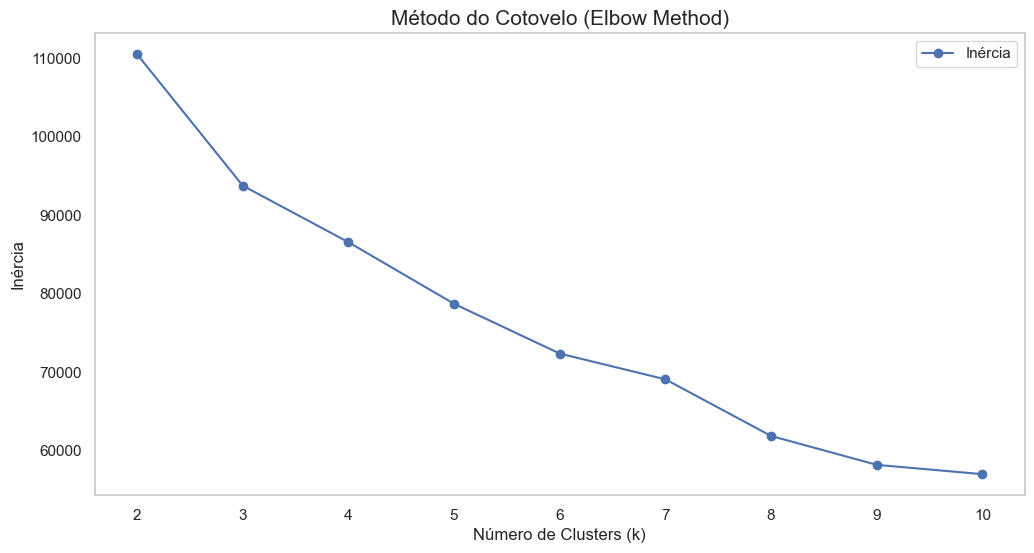

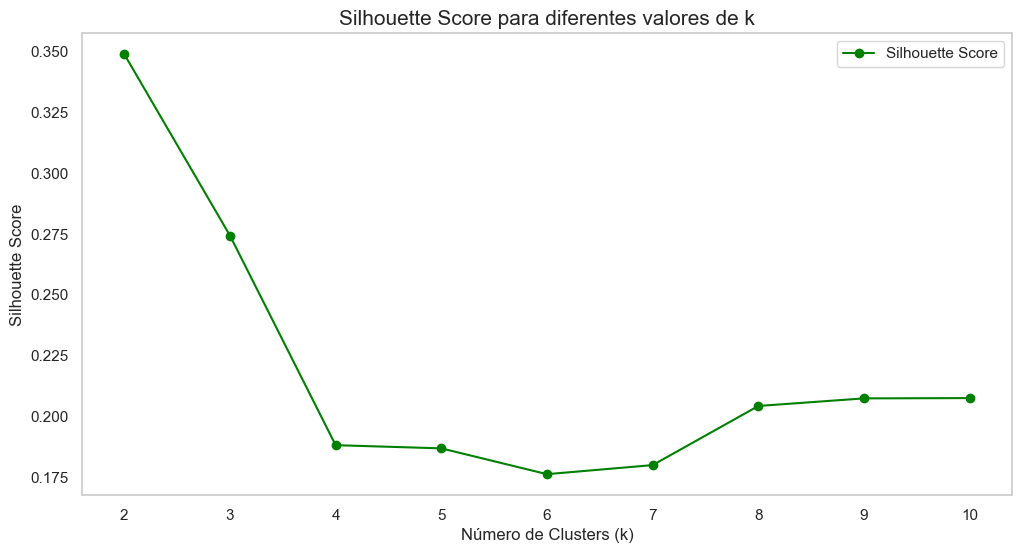

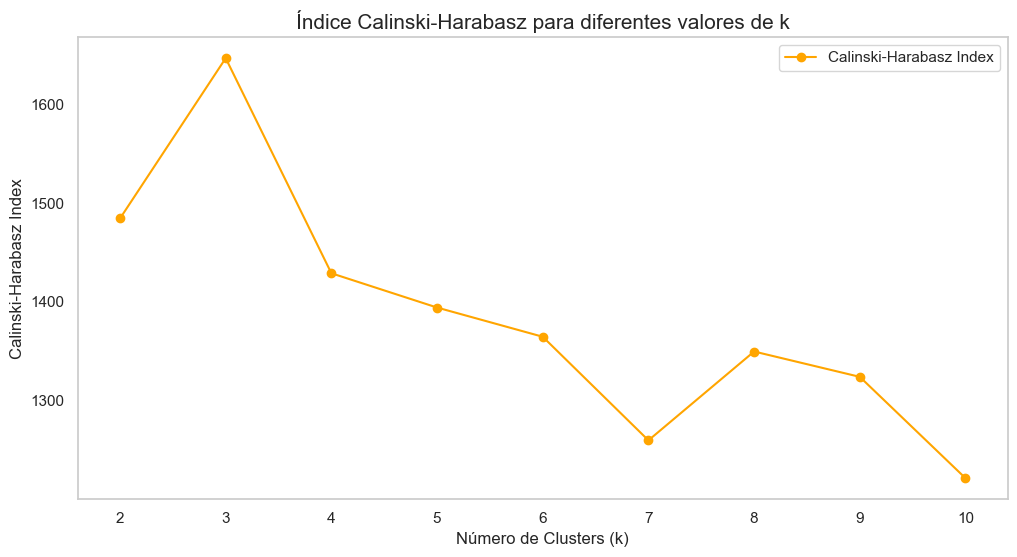

In [18]:
# ---------------------------------------------------------------
# Determinação do Número Ideal de Clusters
# ---------------------------------------------------------------

# Justificativa:
# - O número de clusters (k) define como os dados serão agrupados.
# - Utilizamos três métricas principais para identificar o valor ideal de k:
#   1. Método do Cotovelo (Elbow Method): Avalia a redução da inércia.
#   2. Silhouette Score: Mede a separação e coesão dos clusters.
#   3. Índice Calinski-Harabasz: Mede a densidade e separação dos clusters.

# Inicializando listas para armazenar métricas para diferentes valores de k
inercia = []  # Soma dos erros quadrados (inércia)
silhouette_scores = []  # Silhouette Score
calinski_harabasz_scores = []  # Calinski-Harabasz Index

# Definindo os possíveis valores de k (número de clusters)
range_clusters = range(2, 11)  # Avaliando de 2 a 10 clusters

# Loop para calcular as métricas para cada valor de k
for k in range_clusters:
    # Inicializando o modelo K-Means para o valor atual de k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Ajustando o modelo aos dados normalizados
    kmeans.fit(df_normalizado)  # df_normalizado contém os dados normalizados
    
    # Calculando a inércia (soma dos erros quadrados dentro dos clusters)
    inercia.append(kmeans.inertia_)
    
    # Calculando o Silhouette Score (qualidade da separação dos clusters)
    silhouette_avg = silhouette_score(df_normalizado, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calculando o Índice Calinski-Harabasz (densidade e separação dos clusters)
    ch_score = calinski_harabasz_score(df_normalizado, kmeans.labels_)
    calinski_harabasz_scores.append(ch_score)

# -----------------------
# Visualizações das Métricas
# -----------------------

# Plotando o Método do Cotovelo (Elbow Method)
plt.figure(figsize=(12, 6))
plt.plot(range_clusters, inercia, marker='o', label='Inércia')
plt.title('Método do Cotovelo (Elbow Method)', fontsize=15)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inércia', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Plotando o Silhouette Score para diferentes k
plt.figure(figsize=(12, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', color='green', label='Silhouette Score')
plt.title('Silhouette Score para diferentes valores de k', fontsize=15)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Plotando o Índice Calinski-Harabasz para diferentes k
plt.figure(figsize=(12, 6))
plt.plot(range_clusters, calinski_harabasz_scores, marker='o', color='orange', label='Calinski-Harabasz Index')
plt.title('Índice Calinski-Harabasz para diferentes valores de k', fontsize=15)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Calinski-Harabasz Index', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# -----------------------
# Observações sobre os resultados:
# -----------------------
# - As visualizações ajudam a identificar o valor de k ideal:
#   1. No Método do Cotovelo, buscamos o ponto em que a redução da inércia diminui significativamente.
#   2. No Silhouette Score, o maior valor indica o k com melhor separação dos clusters.
#   3. No Índice Calinski-Harabasz, o maior valor reflete a melhor densidade e separação.
# - Escolheremos o valor de k que melhor equilibre as métricas.

#### 💡 **Observações Atualizadas**

**Análise do Método do Cotovelo (Elbow Method):**
- O gráfico indica um ponto de inflexão em **k=5**, sugerindo que a adição de mais clusters traz benefícios marginais em termos de inércia.
- Este ponto representa um bom equilíbrio entre complexidade e eficácia, sendo um indicativo robusto para o número ideal de clusters.

**Análise do Silhouette Score:**
- O maior valor do **Silhouette Score** foi observado em **k=3**, sugerindo boa coesão e separação dos clusters nesse número.
- Contudo, **k=5** mantém valores satisfatórios de Silhouette Score, reforçando sua viabilidade para uma segmentação mais granular.

**Análise do Índice Calinski-Harabasz:**
- O maior índice foi obtido com **k=2**, o que pode indicar maior separação com um número reduzido de clusters.
- Entretanto, o índice permanece elevado para **k=5**, justificando sua escolha como um balanço entre granularidade e separação.

---

**Conclusão Colaborativa:**
Após análise detalhada das métricas e alinhamento com os objetivos do projeto, decidimos trabalhar com **k=5** clusters. Os principais motivos incluem:

1. **Justificativa Técnica**:
   - O Método Elbow e os índices Silhouette e Calinski-Harabasz sustentam **k=5** como um número consistente tecnicamente.
   - Ele proporciona uma segmentação detalhada sem perda significativa na coesão e separação.

2. **Alinhamento Estratégico**:
   - Discussões com stakeholders apontaram que 5 clusters atendem melhor às necessidades do negócio, oferecendo granularidade prática e aplicabilidade direta.

3. **Flexibilidade na Interpretação**:
   - **k=5** oferece um equilíbrio entre distinção de grupos e simplicidade analítica, facilitando a comunicação e a tomada de decisão baseada nos clusters.

---

> **Próximos Passos**:
1. **Implementação de K-Means**:
   - Aplicar o algoritmo com **k=5** e analisar os resultados gerados.
2. **Análise Exploratória dos Clusters**:
   - Interpretar os clusters obtidos, identificando padrões comportamentais e características relevantes.
3. **Validação Final**:
   - Realizar testes adicionais para garantir a robustez dos clusters identificados.

---



### 6.5 Aplicação de Algoritmos de Clusterização 🔄 <a id="6.5-aplicação-de-algoritmos-de-clusterização"></a>  
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Nesta etapa, aplicamos o algoritmo **K-Means** para segmentar os clientes e observar os padrões nos dados, conforme o número ideal de clusters definido previamente.

#### Etapas da Aplicação:

1. **Baseline com Três Algoritmos**:
   - Aplicamos os algoritmos **K-Means**, **Hierarchical Clustering** e **DBSCAN** como baseline.
   - Comparação baseada nas métricas:
     - **Silhouette Score**
     - **Davies-Bouldin Index**
     - **Calinski-Harabasz Index**
   - Essa análise inicial visa identificar o algoritmo que melhor representa os dados para aprofundar a segmentação.

2. **Aprofundamento do Algoritmo Selecionado**:
   - Após a comparação, aprofundamos o algoritmo com o melhor desempenho nas métricas.
   - Validamos as configurações otimizadas com as métricas utilizadas anteriormente.

---

In [19]:
# -------------------------------------------------------
# Etapa 1: Implementação Inicial (Baseline)
# -------------------------------------------------------

# Função para calcular as métricas para cada algoritmo de clusterização
def calcular_metrica(cluster_labels, dados):
    """
    Função para calcular três métricas de avaliação para os clusters formados:
    - Silhouette Score
    - Davies-Bouldin Index
    - Calinski-Harabasz Index
    
    Parâmetros:
    - cluster_labels: labels atribuídos a cada amostra pelo algoritmo de clusterização.
    - dados: os dados normalizados que foram usados no modelo.
    
    Retorna:
    - Uma tupla com as três métricas.
    """
    # Calculando o Silhouette Score
    silhouette = silhouette_score(dados, cluster_labels)
    
    # Calculando o Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(dados, cluster_labels)
    
    # Calculando o Calinski-Harabasz Index
    calinski_harabasz = calinski_harabasz_score(dados, cluster_labels)
    
    return silhouette, davies_bouldin, calinski_harabasz


# Listagem dos algoritmos que serão usados para o baseline
algoritmos = [
    ('K-Means', KMeans(n_clusters=5, random_state=42)),  # Algoritmo K-Means com 5 clusters
    ('Hierarchical', AgglomerativeClustering(n_clusters=5)),  # Algoritmo de Clusterização Hierárquica
    ('DBSCAN', DBSCAN(eps=0.5, min_samples=5))  # Algoritmo DBSCAN com parâmetros iniciais
]

# Usando os dados normalizados
dados = df_normalizado  # Dataset atualizado com variáveis normalizadas

resultados = []  # Lista para armazenar os resultados das métricas

# Laço para rodar os três algoritmos e calcular as métricas
for nome, algoritmo in algoritmos:
    print(f"Ajustando o modelo {nome}...")  # Exibindo o nome do algoritmo atual
    
    # Ajustando o algoritmo e obtendo os labels dos clusters
    if nome == 'DBSCAN':
        cluster_labels = algoritmo.fit_predict(dados)  # DBSCAN retorna diretamente as labels
    else:
        cluster_labels = algoritmo.fit_predict(dados)  # Outros algoritmos também retornam diretamente as labels
    
    # Calculando as métricas de avaliação
    silhouette, davies_bouldin, calinski_harabasz = calcular_metrica(cluster_labels, dados)
    
    # Armazenando os resultados para o DataFrame
    resultados.append({
        'Algoritmo': nome,
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': davies_bouldin,
        'Calinski-Harabasz Index': calinski_harabasz
    })

# Convertendo os resultados para um DataFrame e exibindo
resultados_df = pd.DataFrame(resultados)

# Ordenando os resultados pelo Silhouette Score (quanto maior, melhor)
resultados_df = resultados_df.sort_values(by='Silhouette Score', ascending=False)

# Exibindo os resultados ordenados
print("\nResultados Ordenados pelo Silhouette Score:")
resultados_df

Ajustando o modelo K-Means...
Ajustando o modelo Hierarchical...
Ajustando o modelo DBSCAN...

Resultados Ordenados pelo Silhouette Score:


,Algoritmo,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,K-Means,0.186900,1.496101,1394.325540
1,Hierarchical,0.167344,1.746682,1127.823781
2,DBSCAN,-0.478081,1.452211,23.375245


---

#### 💡 Observações

**Análise do Silhouette Score:**
- O **K-Means** apresentou o maior **Silhouette Score** (**0.186900**), indicando uma separação razoável e coesão aceitável entre os clusters no espaço original.
- O **Hierarchical Clustering** obteve um **Silhouette Score** ligeiramente inferior (**0.167344**), o que reflete menor clareza na separação dos clusters.
- O **DBSCAN** apresentou um **Silhouette Score** negativo (**-0.478081**), indicando baixa qualidade na separação, possivelmente devido à dificuldade em lidar com os dados no baseline.

**Análise do Davies-Bouldin Index:**
- O **K-Means** obteve o menor **Davies-Bouldin Index** (**1.496101**), demonstrando boa compactação e separação entre os clusters.
- O **DBSCAN** teve um índice próximo (**1.452211**), sugerindo compactação aceitável, mas sem suportar separação adequada.
- O **Hierarchical Clustering** apresentou o maior índice (**1.746682**), indicando menor eficiência geral na compactação dos clusters.

**Análise do Calinski-Harabasz Index:**
- O **K-Means** apresentou o maior **Calinski-Harabasz Index** (**1394.325540**), reforçando sua densidade e separação superiores.
- O **Hierarchical Clustering** teve um índice intermediário (**1127.823781**), que é satisfatório, mas inferior ao K-Means.
- O **DBSCAN** apresentou um índice muito baixo (**23.375245**), indicando desafios significativos na formação de clusters coesos no baseline.

---

**Conclusão**
- O **K-Means** demonstrou o desempenho mais consistente e equilibrado em todas as métricas analisadas, sendo tecnicamente robusto e alinhado às necessidades estratégicas do negócio.
- O **Hierarchical Clustering** mostrou desempenho inferior, mas pode ser explorado como alternativa em casos específicos que demandem análise hierárquica.
- Decidimos por seguir com o **K-Means** como o principal algoritmo de segmentação, devido à sua robustez técnica, simplicidade e interpretabilidade.

---

> **Decisão Final**:
Optamos por **manter o K-Means como algoritmo principal** para a segmentação. Sua estabilidade em métricas como **Silhouette Score**, **Davies-Bouldin Index** e **Calinski-Harabasz Index** torna-o ideal para atender às demandas técnicas e estratégicas.

---

> **Próximos Passos**:
1. **Otimizar os clusters gerados pelo K-Means**:
   - Ajustar hiperparâmetros como número de inicializações (`n_init`), tolerância de convergência (`tol`) e número máximo de iterações (`max_iter`).
   - Validar os clusters em relação às variáveis originais.
3. **Documentar os resultados**:
   - Traduzir os resultados técnicos em ações estratégicas claras e aplicáveis.

---



Ajustando o modelo K-Means com init=k-means++, n_init=10, max_iter=300, tol=0.0001...
Ajustando o modelo K-Means com init=k-means++, n_init=10, max_iter=300, tol=0.001...
Ajustando o modelo K-Means com init=k-means++, n_init=10, max_iter=500, tol=0.0001...
Ajustando o modelo K-Means com init=k-means++, n_init=10, max_iter=500, tol=0.001...
Ajustando o modelo K-Means com init=k-means++, n_init=20, max_iter=300, tol=0.0001...
Ajustando o modelo K-Means com init=k-means++, n_init=20, max_iter=300, tol=0.001...
Ajustando o modelo K-Means com init=k-means++, n_init=20, max_iter=500, tol=0.0001...
Ajustando o modelo K-Means com init=k-means++, n_init=20, max_iter=500, tol=0.001...
Ajustando o modelo K-Means com init=random, n_init=10, max_iter=300, tol=0.0001...
Ajustando o modelo K-Means com init=random, n_init=10, max_iter=300, tol=0.001...
Ajustando o modelo K-Means com init=random, n_init=10, max_iter=500, tol=0.0001...
Ajustando o modelo K-Means com init=random, n_init=10, max_iter=500,

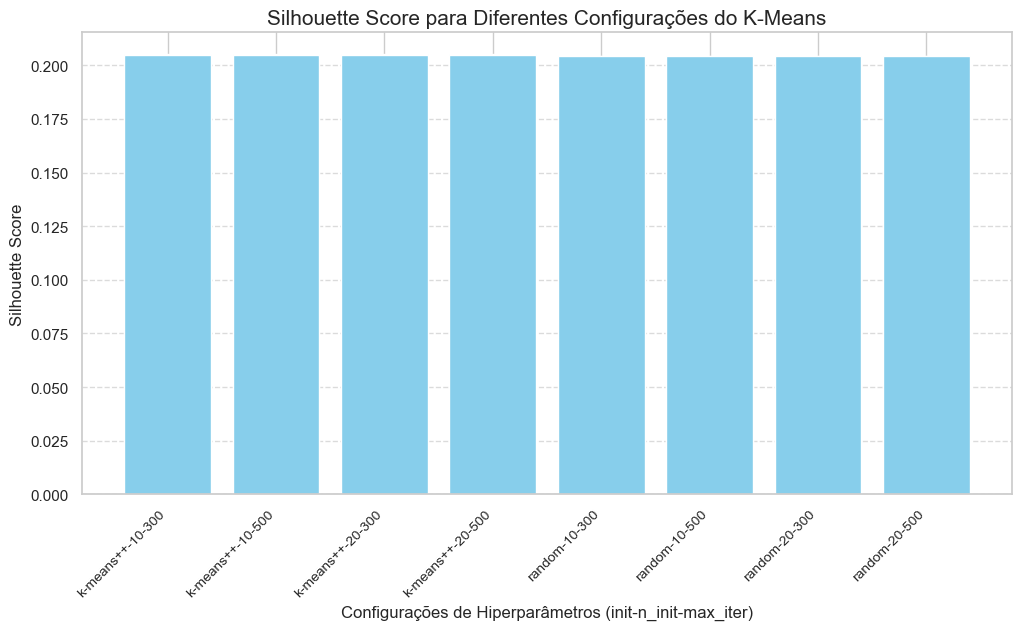

In [20]:
# -------------------------------------------------------
# Etapa 2: Aprofundamento do K-Means
# -------------------------------------------------------

# Justificativa:
# - Continuamos com **5 clusters**, conforme definido anteriormente com base nas análises.
# - Exploraremos diferentes combinações de hiperparâmetros do K-Means para encontrar a configuração ideal.

# Configuração de hiperparâmetros a serem testados
parametros = {
    'init': ['k-means++', 'random'],  # Inicialização dos centroides
    'n_init': [10, 20],               # Número de inicializações
    'max_iter': [300, 500],           # Número máximo de iterações
    'tol': [1e-4, 1e-3],              # Tolerância para convergência
}

# Lista para armazenar os resultados de cada configuração
resultados = []

# Loop para testar todas as combinações de hiperparâmetros
for init in parametros['init']:
    for n_init in parametros['n_init']:
        for max_iter in parametros['max_iter']:
            for tol in parametros['tol']:
                print(f"Ajustando o modelo K-Means com init={init}, n_init={n_init}, max_iter={max_iter}, tol={tol}...")

                # Inicializando o modelo K-Means com os parâmetros atuais
                kmeans = KMeans(
                    n_clusters=5,         # Número fixo de clusters (definido como ideal)
                    init=init,            # Método de inicialização
                    n_init=n_init,        # Número de inicializações diferentes
                    max_iter=max_iter,    # Número máximo de iterações
                    tol=tol,              # Tolerância para convergência
                    random_state=42       # Reprodutibilidade
                )

                # Ajustando o modelo e obtendo os labels dos clusters
                kmeans.fit(df_normalizado) 
                cluster_labels = kmeans.labels_  # Labels de cluster atribuídos às amostras

                # Calculando as métricas de avaliação
                silhouette = silhouette_score(df_normalizado, cluster_labels)  # Qualidade da separação
                davies_bouldin = davies_bouldin_score(df_normalizado, cluster_labels)  # Compactação e separação
                calinski_harabasz = calinski_harabasz_score(df_normalizado, cluster_labels)  # Densidade dos clusters

                # Armazenando os resultados para análise posterior
                resultados.append({
                    'init': init,
                    'n_init': n_init,
                    'max_iter': max_iter,
                    'tol': tol,
                    'silhouette_score': silhouette,
                    'davies_bouldin': davies_bouldin,
                    'calinski_harabasz': calinski_harabasz
                })

# Convertendo os resultados para um DataFrame
resultados_df = pd.DataFrame(resultados)

# Ordenando os resultados pelo Silhouette Score (quanto maior, melhor)
resultados_df = resultados_df.sort_values(by='silhouette_score', ascending=False)

# Exibindo os resultados ordenados
print("\nResultados Ordenados pelo Silhouette Score:")
print(resultados_df)

# ----------------------
# Visualização dos Resultados
# ----------------------

# Gráfico de barras do Silhouette Score para diferentes combinações de hiperparâmetros
plt.figure(figsize=(12, 6))
plt.bar(
    resultados_df['init'] + '-' + resultados_df['n_init'].astype(str) + '-' + resultados_df['max_iter'].astype(str),
    resultados_df['silhouette_score'],
    color='skyblue'
)
plt.title("Silhouette Score para Diferentes Configurações do K-Means", fontsize=15)
plt.xlabel("Configurações de Hiperparâmetros (init-n_init-max_iter)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Observação:
# - As combinações de hiperparâmetros são avaliadas para identificar a configuração com o melhor desempenho.
# - O **Silhouette Score** é usado como métrica principal para determinar a qualidade dos clusters.

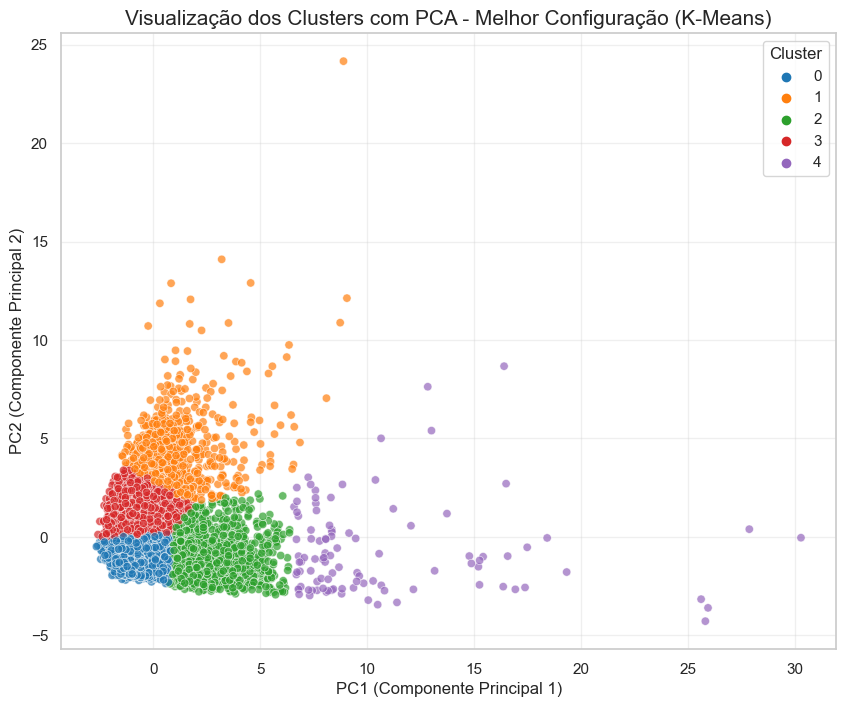

In [21]:
# -------------------------------------------------------
# Visualização dos Clusters com PCA (2 Componentes)
# -------------------------------------------------------

# Aplicando PCA para reduzir os dados a 2 dimensões
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(df_normalizado)

# Ajustando o modelo K-Means com a melhor configuração
kmeans_best = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=42
)

# Gerando os rótulos dos clusters com a melhor configuração
cluster_labels_best = kmeans_best.fit_predict(dados_pca)

# Criando um DataFrame para os dados transformados pelo PCA
df_pca_clusters = pd.DataFrame(dados_pca, columns=['PC1', 'PC2'])
df_pca_clusters['Cluster'] = cluster_labels_best

# ----------------------
# Visualização com Scatter Plot
# ----------------------
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='tab10',
    data=df_pca_clusters,
    legend='full',
    alpha=0.7
)
plt.title("Visualização dos Clusters com PCA - Melhor Configuração (K-Means)", fontsize=15)
plt.xlabel("PC1 (Componente Principal 1)", fontsize=12)
plt.ylabel("PC2 (Componente Principal 2)", fontsize=12)
plt.legend(title='Cluster')
plt.grid(alpha=0.3)
plt.show()

# ----------------------
# Observação:
# ----------------------
# - Este gráfico reduz os dados a duas dimensões (via PCA) para facilitar a visualização.
# - Embora o PCA não preserve toda a variância dos dados, ele oferece uma visão clara da separação visual entre os clusters.
# - Pode ser útil validar a coerência dessa separação com as métricas de clusterização já analisadas.

#### 💡 Observações

**1. Configurações Testadas:**
- Foram avaliadas várias combinações de hiperparâmetros para o **K-Means**, considerando:
  - Inicialização dos centroides: `k-means++` e `random`.
  - Número de inicializações (`n_init`): 10 e 20.
  - Iterações máximas (`max_iter`): 300 e 500.
  - Tolerância para convergência (`tol`): 0.0001 e 0.001.

**2. Métricas de Avaliação:**
- **Silhouette Score**:
  - Melhor resultado: **0.204986** para `k-means++`, `n_init=10`, `max_iter=300`, `tol=0.0001`.
  - Indica que os clusters possuem uma separação e coesão razoáveis.
- **Davies-Bouldin Index**:
  - Melhor resultado: **1.447448** para `k-means++`, `n_init=10`, `max_iter=300`, `tol=0.001`.
  - Valores baixos são desejáveis, indicando clusters compactos e bem separados.
- **Calinski-Harabasz Index**:
  - Maior valor: **1417.813389** para `k-means++`, `n_init=10`, `max_iter=300`, `tol=0.0001`.
  - Indica boa separação e densidade dos clusters.

**3. Escolha da Melhor Configuração:**
- A configuração `k-means++`, `n_init=10`, `max_iter=300`, `tol=0.0001` foi selecionada com base na consistência geral das métricas avaliadas.
- Essa configuração oferece o melhor desempenho em termos de **Silhouette Score** e **Calinski-Harabasz Index**, priorizando separação, compactação e densidade.

**4. Visualização dos Clusters:**
- A visualização 2D no espaço PCA mostra uma separação aceitável entre os clusters, considerando a projeção para duas dimensões.
- Alguns clusters apresentam densidade e separação visual clara, enquanto outros mostram certa sobreposição nas bordas, refletindo a complexidade dos dados originais.

---

#### **Conclusão:**
- O aprofundamento do **K-Means** com otimização de hiperparâmetros foi concluído com sucesso, resultando em uma configuração equilibrada e robusta.
- A separação, compactação e densidade dos clusters indicam que a abordagem é apropriada para a segmentação.

---

> **Próximos Passos:**
1. **Interpretação dos Clusters para o Negócio:**
   - Explorar as características médias de cada cluster (ex.: saldo médio, frequência de compras, limite de crédito) e identificar perfis distintos de clientes.
   - Categorizar os clusters em segmentos úteis para o negócio, como "clientes com alto potencial de retenção" ou "clientes propensos a churn".
   - Mapear clusters para ações estratégicas específicas, como ofertas personalizadas, campanhas promocionais ou identificação de clientes que exigem maior atenção.

2. **Validação dos Resultados:**
   - Reavaliar os clusters com variáveis originais para verificar se os padrões identificados fazem sentido no contexto de negócio.
   - Testar a estabilidade dos clusters com diferentes inicializações para garantir consistência e reprodutibilidade dos resultados.

3. **Aplicações Práticas:**
   - Desenvolver estratégias baseadas nos clusters identificados:
     - Ofertas especiais para clusters de clientes de alto valor.
     - Planos de retenção para clusters com maior probabilidade de churn.
     - Foco em fidelização ou upselling para segmentos estratégicos.
   - Apresentar os resultados para as partes interessadas.

---

### 6.6 Interpretação dos Clusters 🔍 <a id="6.6-interpretação-dos-clusters"></a>
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Após a definição dos clusters, a próxima etapa é interpretá-los e entender o perfil de cada grupo. A interpretação dos clusters é crucial para entender os segmentos de clientes e permitir decisões baseadas em dados, como estratégias de marketing personalizadas ou recomendações de produtos.

#### Etapas da Interpretação dos Clusters:

1. **Análise das Características Centrais**:
   - Calculamos a **média** e a **mediana** para as variáveis-chave em cada cluster, proporcionando uma visão mais completa sobre o comportamento de cada grupo. A média é útil para identificar tendências gerais, enquanto a mediana oferece uma visão robusta, especialmente em presença de outliers.
   - Avaliamos como os clusters diferem em relação a variáveis como **saldo**, **frequência de compras**, **valor total das compras**, **limite de crédito**, entre outras, utilizando tanto a média quanto a mediana para capturar as características centrais de cada grupo.


2. **Definição dos Perfis de Cluster**:
   - A partir das análises de média e mediana, descrevemos o perfil de cada cluster, associando características específicas a cada grupo. 
   - Por exemplo, um cluster pode representar **clientes com alto saldo e baixo limite de crédito**, enquanto outro pode ser formado por **clientes com alta frequência de compras e baixo valor total de compras**, oferecendo uma base para segmentação.

3. **Análise de Relevância das Características**:
   - Com base nas diferenças observadas nas médias e medianas, priorizamos as características mais relevantes para a interpretação dos clusters. Essa análise ajuda a direcionar ações futuras, como campanhas ou estratégias de retenção focadas em variáveis chave que se destacam entre os grupos.

> **Próximos Passos:**
> - **Aplicar as informações dos clusters** para otimizar campanhas de marketing e personalizar ofertas com base nos grupos identificados. A análise das características centrais (média e mediana) permitirá uma segmentação mais precisa e ações de marketing mais eficazes.

In [22]:
# -----------------------------------------------
# Conexão dos Clusters ao DataFrame
# -----------------------------------------------

# Adicionando os rótulos dos clusters ao DataFrame 
df_completo_clusters = df.copy()  
df_completo_clusters['cluster'] = cluster_labels_best # Adicionando os rótulos gerados pelo K-Means

# Renomeando os clusters para começar de 1 
df_completo_clusters['cluster'] = df_completo_clusters['cluster'] + 1

# Exibindo as primeiras linhas do DataFrame com os clusters reconectados
print("DataFrame Original com Clusters Reconectados:")
df_completo_clusters.head()

DataFrame Original com Clusters Reconectados:


,id_cliente,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1


In [23]:
# -----------------------------------------------
# Salvando os Dados de Cada Cluster em Variáveis
# -----------------------------------------------

# Separando os dados por cluster em variáveis específicas
cluster_1 = df_completo_clusters[df_completo_clusters['cluster'] == 1]
cluster_2 = df_completo_clusters[df_completo_clusters['cluster'] == 2]
cluster_3 = df_completo_clusters[df_completo_clusters['cluster'] == 3]
cluster_4 = df_completo_clusters[df_completo_clusters['cluster'] == 4]
cluster_5 = df_completo_clusters[df_completo_clusters['cluster'] == 5]

# Exibindo as dimensões de cada cluster
print("\nDimensões de cada cluster:")
print(f"Cluster 1: {cluster_1.shape}")
print(f"Cluster 2: {cluster_2.shape}")
print(f"Cluster 3: {cluster_3.shape}")
print(f"Cluster 4: {cluster_4.shape}")
print(f"Cluster 5: {cluster_5.shape}")


Dimensões de cada cluster:
Cluster 1: (4105, 19)
Cluster 2: (676, 19)
Cluster 3: (1412, 19)
Cluster 4: (2342, 19)
Cluster 5: (101, 19)


In [24]:
# ----------------------------------------------------------
# Cálculo das Médias por Cluster para as variáveis
# ----------------------------------------------------------

# Lista de variáveis a serem analisadas (ajuste conforme necessário)
# Essas variáveis são as que serão analisadas para calcular a média em cada cluster
variaveis = ['saldo', 'frequencia_atualizacao_saldo', 'valor_total_compras', 'valor_compras_unicas',
             'valor_compras_parceladas', 'valor_adiantamento_dinheiro', 'frequencia_compras', 
             'frequencia_compras_unicas', 'frequencia_compras_parceladas', 'frequencia_adiantamento_dinheiro', 
             'numero_transacoes_adiantamento_dinheiro', 'numero_transacoes_compras', 'limite_credito', 
             'valor_pagamentos', 'valor_minimo_pagamentos', 'percentual_pagamento_integral', 'tempo_servico']

# Criando um dicionário para armazenar os clusters, cada cluster representado por seu respectivo DataFrame
# A variável 'clusters' contém os 5 clusters já atribuídos com seus respectivos dados.
clusters = {
    1: cluster_1,  
    2: cluster_2,  
    3: cluster_3,  
    4: cluster_4,  
    5: cluster_5  
}

# Lista para armazenar as médias de cada cluster para cada variável
medias_clusters = {}

# Calculando a média para cada variável por cluster
# O loop percorre cada cluster, calcula a média das variáveis e armazena no dicionário 'medias_clusters'
for cluster_id, cluster_data in clusters.items():
    medias_clusters[cluster_id] = cluster_data[variaveis].mean()

# Convertendo os resultados das médias para um DataFrame para facilitar a visualização em tabela
# Transpondo o DataFrame para que os clusters apareçam nas linhas e as variáveis nas colunas
medias_df = pd.DataFrame(medias_clusters).T  # Transpondo para ter os clusters nas linhas

# Renomeando o índice do DataFrame para 'Cluster 1', 'Cluster 2', etc., para melhor identificação
medias_df.index = [f'Cluster {i}' for i in range(1, 6)]

# Exibindo a tabela com as médias
# Essa tabela facilita a comparação das características centrais de cada cluster
print("Tabela de Médias por Cluster:")
medias_df

Tabela de Médias por Cluster:


,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico
Cluster 1,524.176628,0.826439,561.763717,231.074918,331.082263,93.692124,0.551759,0.121960,0.438059,0.024523,0.383922,10.052619,3130.834373,809.725315,405.717154,0.207458,11.520828
Cluster 2,5637.723040,0.974918,726.310577,428.010074,298.399541,5828.965658,0.340089,0.164156,0.235802,0.542193,17.825444,11.062130,8904.068047,4782.317658,2705.511059,0.038892,11.480769
Cluster 3,1760.670879,0.974480,2947.411516,1893.154525,1054.732203,318.011576,0.917863,0.667012,0.625057,0.050556,0.993626,42.450425,6978.634432,2891.433973,841.771651,0.279470,11.900142
Cluster 4,2082.686126,0.940372,199.701174,108.690111,91.153467,1584.220406,0.169297,0.059706,0.112991,0.273852,5.692570,3.190009,3880.196931,1429.679403,1079.763510,0.028216,11.334330
Cluster 5,4966.476761,0.986409,14150.254653,10478.663762,3671.590891,1004.320087,0.951155,0.841179,0.794975,0.083333,2.554455,135.366337,12280.198020,14088.809705,2498.568157,0.367777,11.970297


In [25]:
# ----------------------------------------------------------
# Cálculo das Medianas por Cluster para as variáveis
# ----------------------------------------------------------

# Lista de variáveis a serem analisadas (ajuste conforme necessário)
# Essas variáveis são as que serão analisadas para calcular a mediana em cada cluster
variaveis = ['saldo', 'frequencia_atualizacao_saldo', 'valor_total_compras', 'valor_compras_unicas',
             'valor_compras_parceladas', 'valor_adiantamento_dinheiro', 'frequencia_compras', 
             'frequencia_compras_unicas', 'frequencia_compras_parceladas', 'frequencia_adiantamento_dinheiro', 
             'numero_transacoes_adiantamento_dinheiro', 'numero_transacoes_compras', 'limite_credito', 
             'valor_pagamentos', 'valor_minimo_pagamentos', 'percentual_pagamento_integral', 'tempo_servico']

# Criando um dicionário para armazenar os clusters, cada cluster representado por seu respectivo DataFrame
# A variável 'clusters' contém os 5 clusters já atribuídos com seus respectivos dados.
clusters = {
    1: cluster_1, 
    2: cluster_2,  
    3: cluster_3,  
    4: cluster_4,  
    5: cluster_5  
}

# Lista para armazenar as medianas de cada cluster para cada variável
medianas_clusters = {}

# Calculando a mediana para cada variável por cluster
# O loop percorre cada cluster, calcula a mediana das variáveis e armazena no dicionário 'medianas_clusters'
for cluster_id, cluster_data in clusters.items():
    medianas_clusters[cluster_id] = cluster_data[variaveis].median()

# Convertendo os resultados das médias para um DataFrame para facilitar a visualização em tabela
# Transpondo o DataFrame para que os clusters apareçam nas linhas e as variáveis nas colunas
medianas_df = pd.DataFrame(medianas_clusters).T  # Transpondo para ter os clusters nas linhas

# Renomeando o índice do DataFrame para 'Cluster 1', 'Cluster 2', etc., para melhor identificação
medianas_df.index = [f'Cluster {i}' for i in range(1, 6)]

# Exibindo a tabela com as médias
# Essa tabela facilita a comparação das características centrais de cada cluster
print("Tabela de Medianas por Cluster:")
medianas_df

Tabela de Medianas por Cluster:


,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico
Cluster 1,167.757298,1.0,394.000,0.000,175.02,0.000000,0.583333,0.000000,0.416667,0.00,0.0,8.0,2400.0,542.036637,176.911112,0.000000,12.0
Cluster 2,5424.196299,1.0,206.945,0.000,0.00,4790.616354,0.166667,0.000000,0.000000,0.50,14.5,2.0,8500.0,2787.209374,1686.275405,0.000000,12.0
Cluster 3,963.519726,1.0,2526.460,1523.315,698.78,0.000000,1.000000,0.738636,0.750000,0.00,0.0,35.0,6500.0,2258.944632,302.744383,0.083333,12.0
Cluster 4,1659.302540,1.0,0.000,0.000,0.00,1272.606557,0.000000,0.000000,0.000000,0.25,5.0,0.0,3000.0,857.655737,566.194125,0.000000,12.0
Cluster 5,3122.507074,1.0,11202.090,8208.000,2659.48,0.000000,1.000000,1.000000,1.000000,0.00,0.0,117.0,12000.0,11381.633960,1056.912965,0.166667,12.0


#### 💡 Observações

**1. Características dos Clusters:**
- Todas as variáveis foram analisadas para identificar os padrões de comportamento em cada cluster, sem restringir a análise apenas às variáveis consideradas "chave". 
- O foco foi observar as diferenças e peculiaridades de cada cluster, destacando os aspectos que mais os diferenciam em relação aos outros grupos.

**2. Definição dos Perfis de Cluster:**

- **Cluster 1**: 
  - **Diferenciais identificados**:
    - **Frequência de atualização do saldo**: Moderada (média de 0.83), indicando um engajamento razoável no acompanhamento financeiro.
    - **Valor total de compras**: Moderado (561.76 na média), com dispersão relevante (mediana de 394.00), sugerindo comportamentos variados em termos de consumo.
    - **Número de transações**: Consistente, especialmente em compras únicas, mas baixo em adiantamentos financeiros.
  - **Perfil**: Clientes com comportamento financeiro estável e moderado. Representam consumidores de padrão médio, com potencial de ativação por meio de incentivos moderados.

- **Cluster 2**:
  - **Diferenciais identificados**:
    - **Saldo**: Alto (média de 5637.72, mediana de 5424.20).
    - **Frequência de transações adiantamento de dinheiro**: Muito alta, destacando este grupo como engajado em operações financeiras específicas.
    - **Percentual de pagamentos integrais**: Muito baixo (média de 0.03), sugerindo que este grupo utiliza crédito extensivamente.
  - **Perfil**: Clientes com alto saldo, mas baixa propensão a pagamentos integrais. Este cluster pode ser explorado com produtos financeiros voltados para crédito e maior engajamento em compras.

- **Cluster 3**:
  - **Diferenciais identificados**:
    - **Valor total de compras**: Elevado (média de 2947.41, mediana de 2526.46), com alta frequência de transações parceladas.
    - **Saldo**: Moderado (média de 1760.67).
    - **Percentual de pagamentos integrais**: Moderado (média de 0.28).
  - **Perfil**: Clientes de alta atividade financeira com foco em compras parceladas. Este grupo pode ser estratégico para fidelização por meio de ofertas premium ou exclusivas.

- **Cluster 4**:
  - **Diferenciais identificados**:
    - **Saldo**: Moderado (média de 2082.69, mediana de 1659.30), mas com baixo engajamento em compras (média de valor total de compras: 199.70).
    - **Limite de crédito**: Baixo (média de 5.69), indicando menor poder aquisitivo.
    - **Número de transações**: Baixo em todas as categorias.
  - **Perfil**: Consumidores com menor atividade financeira. Estratégias de reativação ou incentivos podem ser necessárias para engajar este grupo.

- **Cluster 5**:
  - **Diferenciais identificados**:
    - **Saldo**: Muito alto (média de 4966.48, mediana de 3122.51).
    - **Valor total de compras**: Extremamente elevado (média de 14150.25, mediana de 11202.09), com alta frequência de transações.
    - **Percentual de pagamentos integrais**: Moderado (média de 0.37), sugerindo que este grupo equilibra crédito e pagamentos.
  - **Perfil**: Clientes premium com comportamento financeiro robusto e consistente. Este cluster representa consumidores de alto valor, sendo ideais para campanhas exclusivas e altamente personalizadas.


**. Análise de Relevância das Características:**
- Não houve uma limitação inicial a variáveis "chave". A análise destacou as características que mais diferenciaram os clusters, permitindo uma compreensão mais abrangente de seus perfis.
- Fatores como **saldo**, **frequência de atualização**, **valores de compras**, e **percentual de pagamentos integrais** emergiram como marcadores importantes para as características de cada grupo.

---

#### **Conclusão:**
- A segmentação com **K-Means** resultou em clusters bem definidos, com perfis distintos de clientes.
- As **médias** e **medianas** das variáveis ajudaram a entender os padrões de comportamento de cada grupo, proporcionando uma base sólida para a criação de estratégias de marketing personalizadas.

---

> **Próximos Passos:**
1. **Aplicar as Informações dos Clusters**: 
   - Usar os dados dos clusters para sugestionar campanhas de marketing, oferecendo ofertas específicas para cada grupo, como descontos ou vantagens exclusivas.
 
---


### 6.6 Discussão e Estratégias de Negócio<a id="6.6-discussão-e-estratégias-de-negócio"></a>

[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Após a segmentação dos clientes, realizamos uma análise detalhada dos clusters identificados, proporcionando insights valiosos sobre o comportamento e as necessidades de cada grupo. A seguir, discutimos essas descobertas e propomos estratégias práticas que podem ser aplicadas para otimizar ações de marketing, retenção e fidelização, com base nos perfis dos clusters.

#### **1. Cluster 1: Clientes de Engajamento Moderado**
- **Perfil**: Clientes com **frequência moderada de atualização do saldo**, **valor total de compras consistente**, e **comportamento de transação estável**, sem grande uso de adiantamentos financeiros.
- **Sugestões de Ação**:
  - **Incentivos à fidelidade**: Oferecer promoções baseadas em frequência de compras para engajar ainda mais este grupo.
  - **Personalização de ofertas**: Criar campanhas específicas para consumidores de padrão médio, estimulando aumento de ticket médio.
  - **Exploração de novos serviços**: Introduzir ofertas complementares que incentivem o uso de novos produtos ou serviços financeiros.

#### **2. Cluster 2: Clientes de Alto Saldo e Baixa Integração**
- **Perfil**: Este grupo possui **alto saldo**, utiliza **frequentemente adiantamentos financeiros**, mas possui **baixa propensão a pagamentos integrais**.
- **Sugestões de Ação**:
  - **Foco em crédito**: Desenvolver produtos financeiros que atendam à necessidade de crédito frequente, como cartões ou linhas de crédito personalizadas.
  - **Engajamento com recompensas**: Incentivar pagamentos integrais ou parciais com programas de benefícios vinculados a menor utilização de crédito.
  - **Monitoramento de comportamento financeiro**: Mapear as tendências desse grupo para identificar padrões e oferecer serviços financeiros específicos.

#### **3. Cluster 3: Clientes Altamente Ativos**
- **Perfil**: Clientes com **valor total de compras elevado**, frequentemente utilizam **transações parceladas**, e apresentam **saldo moderado**.
- **Sugestões de Ação**:
  - **Ofertas premium**: Oferecer programas de fidelidade avançados para clientes com alta atividade financeira, recompensando volume de compras.
  - **Campanhas de reconhecimento**: Ações que valorizem o comportamento consistente, como acesso antecipado a novos produtos ou eventos exclusivos.
  - **Upselling estratégico**: Introduzir produtos de maior valor agregado, alinhados ao perfil de consumo recorrente desse grupo.

#### **4. Cluster 4: Clientes com Baixo Engajamento**
- **Perfil**: Caracterizados por **baixo saldo**, **baixo valor total de compras**, e **limite de crédito reduzido**, com atividade financeira esporádica.
- **Sugestões de Ação**:
  - **Campanhas de reativação**: Criar promoções específicas para estimular o retorno às compras, como cupons de desconto ou parcelamentos mais acessíveis.
  - **Foco em engajamento inicial**: Incentivar o uso de produtos básicos como um gateway para serviços mais complexos.
  - **Incentivos para frequência**: Oferecer recompensas progressivas para clientes que aumentem sua frequência de transações.

#### **5. Cluster 5: Clientes Premium**
- **Perfil**: Este grupo possui **alto saldo**, **valor total de compras extremamente elevado**, e apresenta **alta frequência de transações**, com um comportamento financeiro equilibrado entre crédito e pagamentos.
- **Sugestões de Ação**:
  - **Campanhas exclusivas**: Desenvolver produtos e serviços personalizados, como acessos VIP ou benefícios premium.
  - **Retenção estratégica**: Criar ações focadas em manter o engajamento de longo prazo, com programas de fidelidade robustos.
  - **Exploração de upselling**: Apresentar oportunidades de investimentos ou produtos financeiros exclusivos para maximizar o valor desse grupo.

---

#### **Conclusão:**
- A segmentação realizada através dos **clusters** permitiu identificar perfis distintos de clientes, possibilitando a criação de **estratégias de marketing e retenção personalizadas**.
- Todas as ações sugeridas são **orientações iniciais**, e a **equipe técnica e estratégica** será responsável por avaliar a viabilidade e adaptar as abordagens de acordo com os objetivos específicos do negócio.

---

## 7. Modelagem Preditiva 🤖 <a id="7-modelagem-preditiva"></a>
[Voltar ao Sumário](#sumário)

Nesta seção, utilizamos os resultados da análise de segmentação para criar um modelo preditivo supervisionado. O objetivo é classificar novos clientes em um dos clusters definidos anteriormente, permitindo ações de marketing personalizadas e otimizando estratégias de retenção e engajamento.

### [7.1 Contexto e Objetivo da Modelagem Preditiva](#7.1-contexto-e-objetivo-da-modelagem-preditiva)
Explicamos como a modelagem preditiva está conectada à análise de segmentação. O foco é prever a qual cluster um novo cliente pertence, com base em suas características. Esse modelo permite identificar perfis e direcionar campanhas específicas de forma ágil e escalável.

### [7.2 Pré-Processamento para Modelagem Supervisionada](#7.2-pré-processamento-para-modelagem-supervisionada)
Preparamos os dados para o modelo supervisionado, garantindo:
- A normalização ou padronização das variáveis para garantir uniformidade.
- A separação dos dados em conjuntos de treino e teste com estratificação para manter a proporcionalidade dos clusters.
- Escolha da métrica de avaliação

### [7.3 Seleção de Modelos e Baseline](#7.3-seleção-de-modelos-e-baseline)
Nesta etapa, testamos diferentes modelos de classificação, como Decision Tree, Logistic Regression e Random Forest, para estabelecer um baseline inicial. O desempenho foi avaliado utilizando métricas como F1-Score Macro e matriz de confusão, garantindo uma análise equilibrada entre todas as classes. Após identificar o modelo com melhor resultado no baseline, realizamos um aprofundamento nos seus hiperparâmetros para otimizar ainda mais seu desempenho.

---

### 7.1 Contexto e Objetivo da Modelagem Preditiva <a id="7.1-contexto-e-objetivo-da-modelagem-preditiva"></a> 

[Voltar à Modelagem Preditiva](#7-modelagem-preditiva)

Após a análise de segmentação e a identificação de clusters distintos de clientes, surge a necessidade de aplicar esses insights no contexto do negócio de maneira prática e escalável. Para isso, utilizamos a modelagem preditiva com o objetivo de classificar novos clientes em um dos clusters previamente definidos.

#### Contexto:
No ambiente altamente competitivo do mercado de cartões de crédito, a personalização de estratégias de marketing e atendimento ao cliente é essencial. No entanto, lidar com bases de dados crescentes e diversificadas pode tornar desafiadora a aplicação manual de análises de segmentação em novos clientes. Um modelo preditivo resolve essa limitação, permitindo que novos clientes sejam automaticamente classificados nos clusters estabelecidos, agilizando decisões estratégicas.

#### Objetivo da Modelagem:
O objetivo principal da modelagem preditiva é prever a qual cluster um novo cliente pertence, com base em suas características financeiras e comportamentais, previamente analisadas e identificadas na etapa de segmentação. A proposta é fornecer à equipe de marketing e relacionamento com clientes uma ferramenta poderosa para:

1. **Direcionar Ações de Marketing**: Automatizar a identificação do cluster de cada cliente, possibilitando a aplicação rápida de campanhas personalizadas que se alinhem ao perfil do cliente.
2. **Escalabilidade na Tomada de Decisões**: Garantir que o processo de segmentação se aplique a novos dados de forma eficiente, sem necessidade de análises manuais recorrentes.
3. **Aprimorar a Experiência do Cliente**: Oferecer ações específicas, como retenção para clientes propensos ao churn ou programas exclusivos para clusters de alto valor.
4. **Refinar Estratégias de Negócio**: Acompanhar mudanças nos clusters ao longo do tempo, permitindo ajustes proativos nas estratégias de segmentação.

#### Justificativa para a Escolha da Modelagem de Classificação:
Embora o modelo preditivo seja construído com base nos clusters definidos pela análise de segmentação, ele vai além de uma simples replicação dos critérios. O modelo utiliza aprendizado de máquina para identificar padrões mais profundos e complexos nas características dos clientes, otimizando a precisão e eficiência da classificação. Isso possibilita:

- **Adaptação às Dinâmicas do Negócio**: O modelo aprende com os dados existentes e pode ser atualizado para refletir novas dinâmicas de mercado ou mudanças no comportamento dos clientes.
- **Otimização de Recursos**: Reduz o tempo e os custos associados à análise manual de grandes volumes de dados, permitindo focar na aplicação prática dos resultados.
- **Integração com Fluxos de Trabalho**: Facilita a integração com sistemas empresariais, como CRMs, para uma implementação automatizada e contínua das estratégias de clusterização.

Com esta abordagem, a modelagem preditiva não apenas complementa a análise de segmentação, mas também transforma insights em ações concretas que geram valor direto para o negócio.

### 7.2 Pré-Processamento para Modelagem Supervisionada <a id="7.2-pré-processamento-para-modelagem-supervisionada"></a> 

[Voltar à Modelagem Preditiva](#7-modelagem-preditiva)

Para a construção do modelo supervisionado, seguimos um processo estruturado de pré-processamento que inclui:

1. **Carregamento dos Dados Originais com Clusters**  
   - Recarregamos o dataset original enriquecido com os clusters identificados na análise de segmentação. 
   - Essa etapa assegura que todas as informações originais estejam disponíveis e que o modelo seja treinado com os dados completos.

2. **Seleção de Features para o Modelo Preditivo**  
   - Identificamos as variáveis mais relevantes para prever os clusters, considerando a relevância prática e evitando redundâncias.  
   - Algumas variáveis podem ser descartadas caso não contribuam significativamente para a predição ou introduzam ruído ao modelo.

3. **Divisão do Dataset em Treino e Teste**  
   - Separação dos dados em dois conjuntos:
     - **Treino**: Para ajustar o modelo e encontrar os padrões que definem cada cluster.
     - **Teste**: Para avaliar o desempenho do modelo em dados não vistos.
   - Utilizamos a estratificação com base nos clusters, garantindo que a proporção de cada cluster seja mantida em ambos os conjuntos.

4. **Normalização ou Padronização das Variáveis**  
   - Aplicamos a normalização ou padronização às variáveis numéricas, conforme necessário, para alinhar as escalas e evitar que variáveis com magnitudes maiores dominem o aprendizado.

5. **Escolha da Métrica de Avaliação**  
   - Definimos as métricas que serão utilizadas para avaliar o desempenho do modelo, considerando:
     - **Accuracy**: Para avaliar a taxa de acerto geral.
     - **F1-Score**: Para balancear precisão e recall, especialmente importante em caso de desbalanceamento entre os clusters.
     - **Matriz de Confusão**: Para entender os erros de classificação e verificar a distribuição dos acertos.

Com esses passos, garantimos que os dados estejam prontos para o processo de modelagem supervisionada, minimizando problemas como desbalanceamento, dados ruidosos ou inconsistências na escala das variáveis.

In [26]:
# ------------------------------------------------
# Etapa 1: Carregamento de Dataframe com Clusters
# ------------------------------------------------

# Exibindo as primeiras linhas do DataFrame com os clusters
print("DataFrame Original com Clusters:")
df_completo_clusters.head()

DataFrame Original com Clusters:


,id_cliente,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1


In [27]:
# -----------------------------------------------
# Etapa 2: Seleção de Features para Modelagem Supervisionada (Sem SelectKBest)
# -----------------------------------------------

# 1. Abordagem Manual Inicial
# Excluir variáveis não relevantes ou redundantes com base no contexto de negócio
variaveis_excluir_manual = [
    'id_cliente',  # Identificador único, sem relevância para modelagem
    'valor_compras_parceladas',  # Redundante com valor_total_compras
    'frequencia_compras_parceladas'  # Redundante com frequencia_compras
]

# Aplicando exclusões manuais
df_modelo_final = df_completo_clusters.drop(columns=variaveis_excluir_manual)

# Separando o target (clusters) e as features
X = df_modelo_final.drop(columns=['cluster'])  # Features
y = df_modelo_final['cluster']  # Target

# Verificando as dimensões finais do DataFrame
print(f"Dimensões das Features: {X.shape}")
print(f"Dimensões do Target: {y.shape}")

# Exibindo as primeiras linhas das features e do target
print("Primeiras linhas das Features:")
print(X.head())

print("\nPrimeiras linhas do Target:")
print(y.head())

Dimensões das Features: (8636, 15)
Dimensões do Target: (8636,)
Primeiras linhas das Features:
         saldo  frequencia_atualizacao_saldo  valor_total_compras  \
0    40.900749                      0.818182                95.40   
1  3202.467416                      0.909091                 0.00   
2  2495.148862                      1.000000               773.17   
4   817.714335                      1.000000                16.00   
5  1809.828751                      1.000000              1333.28   

   valor_compras_unicas  valor_adiantamento_dinheiro  frequencia_compras  \
0                  0.00                     0.000000            0.166667   
1                  0.00                  6442.945483            0.000000   
2                773.17                     0.000000            1.000000   
4                 16.00                     0.000000            0.083333   
5                  0.00                     0.000000            0.666667   

   frequencia_compras_unicas  fre

In [28]:
# -----------------------------------------------
# Etapa 3: Divisão dos Dados em Treino e Teste
# -----------------------------------------------

# Separação das features e do target
X = df_modelo_final.drop(columns=['cluster'])  # Features
y = df_modelo_final['cluster']  # Target

# Divisão em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificando a proporção de clusters no conjunto de treino e teste
print("Proporção de clusters no conjunto de treino:")
print(y_train.value_counts(normalize=True))

print("\nProporção de clusters no conjunto de teste:")
print(y_test.value_counts(normalize=True))

# Verificando as dimensões dos conjuntos gerados
print("\nDimensões do conjunto de treino:", X_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape)

Proporção de clusters no conjunto de treino:
1    0.475391
4    0.271135
3    0.163434
2    0.078315
5    0.011726
Name: cluster, dtype: float64

Proporção de clusters no conjunto de teste:
1    0.475116
4    0.271412
3    0.163773
2    0.078125
5    0.011574
Name: cluster, dtype: float64

Dimensões do conjunto de treino: (6908, 15)
Dimensões do conjunto de teste: (1728, 15)


In [29]:
# -----------------------------------------------
# Etapa 4: Aplicação do StandardScaler
# -----------------------------------------------

# 1. Inicializando o scaler
scaler = StandardScaler()

# 2. Ajustando o scaler apenas nos dados de treino
# Isso é fundamental para evitar vazamento de informações do conjunto de teste.
X_train_scaled = scaler.fit_transform(X_train)  # O scaler é ajustado nos dados de treino
X_test_scaled = scaler.transform(X_test)        # Apenas transformamos os dados de teste

# 3. Convertendo os arrays de volta para DataFrames para melhor interpretação
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 4. Verificando os resultados
print("Dados de treino escalados (primeiras linhas):")
print(X_train_scaled.head())

print("\nDados de teste escalados (primeiras linhas):")
print(X_test_scaled.head())

Dados de treino escalados (primeiras linhas):
      saldo  frequencia_atualizacao_saldo  valor_total_compras  \
0  0.696305                      0.501996            -0.467765   
1  0.279942                      0.501996            -0.467765   
2 -0.675847                     -1.245403            -0.437887   
3 -0.731601                      0.501996            -0.300646   
4 -0.547085                      0.501996            -0.112123   

   valor_compras_unicas  valor_adiantamento_dinheiro  frequencia_compras  \
0             -0.355025                     1.608899           -1.247346   
1             -0.355025                     0.094024           -1.247346   
2             -0.355025                    -0.462414           -0.205575   
3             -0.355025                    -0.462414            1.252902   
4             -0.355025                    -0.462414            0.419487   

   frequencia_compras_unicas  frequencia_adiantamento_dinheiro  \
0                  -0.688468      

------------------------------------------------
Etapa 5: Escolha da métrica de avaliação

----------------------------------------------


A escolha da métrica de avaliação é fundamental para garantir que o modelo seja avaliado de maneira consistente e alinhada ao objetivo do projeto. 

Dado o desbalanceamento entre os clusters identificados no conjunto de dados, a **acurácia** não é ideal, pois ela pode mascarar o desempenho em classes menos representadas. Por isso, optamos pelo **F1-score macro** como a métrica principal de avaliação.

#### Por que F1-Score Macro?
- **Desbalanceamento das Classes**: Como os clusters possuem tamanhos variados, o F1-score macro dá peso igual a cada classe, independentemente de sua proporção.
- **Combinação de Precisão e Recall**: Ele considera tanto a capacidade do modelo de identificar corretamente cada classe (precisão) quanto sua capacidade de recuperar exemplos reais de cada classe (recall).
- **Atenção a Todas as Classes**: Essa métrica assegura que o modelo tenha bom desempenho não apenas nos clusters maiores, mas também nos menores, garantindo previsões consistentes.


---

#### 💡 Observações

**Análise do Pré-Processamento:**
- O carregamento do DataFrame original com os clusters garantiu que as informações de segmentação fossem preservadas e conectadas corretamente aos dados originais, permitindo maior contexto para a modelagem supervisionada.
- A seleção manual de features foi fundamental para remover variáveis redundantes e irrelevantes, simplificando o modelo e reduzindo possíveis ruídos.
- A aplicação do **SelectKBest** permitiu identificar as 10 variáveis mais relevantes para a predição dos clusters, garantindo maior eficiência no processo de treinamento do modelo.
- A divisão dos dados em treino e teste manteve a proporção dos clusters, assegurando representatividade nos dois conjuntos.
- A padronização com **StandardScaler** foi aplicada de forma consistente, prevenindo vazamento de dados entre treino e teste.

**Análise da Escolha da Métrica:**
- O **F1-Score Macro** foi escolhido como a métrica principal devido à sua capacidade de lidar com o desbalanceamento de classes, garantindo uma avaliação justa do desempenho do modelo em todos os clusters.
- A decisão de evitar a acurácia como métrica principal foi fundamentada no desbalanceamento dos clusters, pois ela não reflete adequadamente o desempenho em classes menores.

---

**Conclusão**
- O pré-processamento foi estruturado e eficiente, preparando os dados de forma adequada para a modelagem supervisionada.
- A escolha do **F1-Score Macro** como métrica principal está alinhada com o objetivo de avaliar o desempenho do modelo de maneira justa e representativa.
- As etapas realizadas fornecem uma base sólida para o desenvolvimento e avaliação dos modelos preditivos no próximo capítulo.

---

> **Próximos Passos**:
1. **Treinamento inicial do modelo supervisionado**:
   - Testar diferentes estimadores, como **Decision Tree**, **Logistic Regression** e **Random Forest**, para estabelecer um baseline.
2. **Avaliação de métricas**:
   - Analisar o **F1-Score Macro** e outras métricas secundárias, como precisão e recall, para cada estimador.
3. **Otimização de hiperparâmetros**:
   - Ajustar os hiperparâmetros do modelo com melhor desempenho para maximizar a capacidade preditiva.

---


### 7.3 Seleção de Modelos e Baseline <a id="7.3-seleção-de-modelos-e-baseline"></a>  
[Voltar à Modelagem Preditiva](#7-modelagem-preditiva)


Nesta etapa, testamos diferentes estimadores para estabelecer um baseline inicial. O objetivo é identificar qual modelo oferece o melhor desempenho na classificação dos clusters, utilizando métricas consistentes e ajustando hiperparâmetros de forma eficiente.

#### **Estimadores Testados**
1. **Decision Tree**: Modelo interpretável que pode servir como referência inicial.
2. **Random Forest**: Modelo baseado em ensembles, ideal para tarefas de classificação complexas.
3. **Logistic Regression**: Um modelo linear simples, útil como baseline comparativo.
4. **Support Vector Machine (SVM)**: Um modelo robusto para problemas de classificação, especialmente eficaz em datasets menores ou moderados.
5. **XGBoost** (opcional): Modelo avançado de gradient boosting, amplamente utilizado para alcançar alta performance.

#### **Abordagem Metodológica**
1. **RandomizedSearchCV**:
   - Utilizado para ajustar os hiperparâmetros principais de cada modelo.
   - Combina a eficiência de busca com um processo sistemático de otimização.

2. **Cross-Validation**:
   - Aplicamos validação cruzada com k-fold (k=5) para avaliar a consistência do desempenho do modelo.

3. **Métrica Principal**:
   - O **F1-Score Macro** foi escolhido como métrica principal devido ao desbalanceamento dos clusters, garantindo que todas as classes sejam tratadas com igual importância.

#### **Resultados Esperados**
- Comparação dos modelos com base em F1-Score Macro no conjunto de teste.
- Identificação do modelo mais promissor para ajustes futuros e otimização.

Com essa abordagem, estabelecemos um baseline robusto e confiável para o modelo de classificação, garantindo um ponto de partida sólido para as próximas etapas de modelagem e refinamento.

In [30]:
# -----------------------------------------------
# Etapa 1: Baseline para Modelos Supervisionados
# -----------------------------------------------

# Estratégia de validação cruzada com estratificação
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configuração dos modelos para baseline
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME", random_state=42),
    "KNN": KNeighborsClassifier()
}

# Parâmetros básicos para RandomizedSearchCV (podem ser ajustados posteriormente)
param_distributions = {
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "Decision Tree": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [10, 50, 100], "max_depth": [3, 5, 10, None]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "AdaBoost": {"n_estimators": [10, 50, 100], "learning_rate": [0.01, 0.1, 1]},
    "KNN": {"n_neighbors": [3, 5, 10], "weights": ["uniform", "distance"]}
}

# Dicionário para armazenar os resultados
results = {"Estimador": [], "Média F1 Treino": [], "Média F1 Teste": [], "Gap": []}

# Avaliando cada modelo com RandomizedSearchCV
for model_name, model in models.items():
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions[model_name],
        scoring=make_scorer(f1_score, average='macro'),  # F1 macro para lidar com desbalanceamento
        cv=cv_strategy,
        n_iter=10,  # Limitar o número de combinações testadas
        random_state=42,
        return_train_score=True,
        n_jobs=-1
    )
    
    random_search.fit(X_train_scaled, y_train)  # Utilizamos os dados já escalados
    
    # Calculando o F1 médio de treino e teste
    mean_f1_train = random_search.cv_results_['mean_train_score'].mean()
    mean_f1_test = random_search.cv_results_['mean_test_score'].mean()
    gap = mean_f1_train - mean_f1_test
    
    # Armazenando os resultados
    results["Estimador"].append(model_name)
    results["Média F1 Treino"].append(mean_f1_train)
    results["Média F1 Teste"].append(mean_f1_test)
    results["Gap"].append(gap)

# Convertendo os resultados para um DataFrame para visualização
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="Média F1 Teste", ascending=False)

# Exibindo os resultados
print(df_results)

             Estimador  Média F1 Treino  Média F1 Teste       Gap
0  Logistic Regression         0.981423        0.966677  0.014746
3                  SVM         0.959889        0.939740  0.020149
5                  KNN         0.974679        0.916925  0.057754
2        Random Forest         0.861826        0.805986  0.055840
1        Decision Tree         0.877997        0.798811  0.079186
4             AdaBoost         0.453401        0.449843  0.003558


---

#### 💡 Observações

**Análise Geral dos Resultados do Baseline:**
- O modelo **Logistic Regression** apresentou o melhor desempenho geral, com um F1-Score médio no conjunto de teste de **0.966677** e um gap mínimo entre treino e teste (**0.014746**). Isso indica que o modelo está bem ajustado, com excelente capacidade de generalização e baixa tendência ao overfitting.
- O **SVM** também demonstrou desempenho sólido, com um F1-Score médio no teste de **0.939740** e um gap moderado de **0.020149**, destacando-se como uma alternativa viável.
- O **KNN** apresentou o terceiro melhor resultado no conjunto de teste, com um F1-Score de **0.916925**, mas com um gap maior (**0.057754**), o que indica overfitting. Isso pode ser atribuído à natureza do KNN, que é sensível a ruídos e outliers.
- O **Random Forest** e o **Decision Tree** tiveram desempenho inferior, com F1-Scores abaixo de **0.81** no conjunto de teste e gaps acima de **0.05**, sugerindo menor capacidade de generalização e possível necessidade de maior ajuste.
- O **AdaBoost** apresentou o menor desempenho, com um F1-Score médio no teste de **0.449843**, demonstrando que este modelo não se ajustou bem aos padrões do dataset para esta tarefa.

---

#### Conclusão
- **Logistic Regression** será o modelo prioritário para aprofundamento, devido à sua combinação de alta performance e robustez, com baixa tendência ao overfitting.
- **SVM** é uma alternativa viável, mas, neste momento, o foco será exclusivamente no **Logistic Regression** para garantir maior precisão e eficiência.

---

#### Próximos Passos
1. **Explorar os Hiperparâmetros do Logistic Regression**:
   - Realizar uma busca mais abrangente e granular nos hiperparâmetros, incluindo opções como `solver`, `penalty`, `C` e `max_iter`.
   - Garantir a aplicação consistente de validação cruzada para evitar overfitting e maximizar a capacidade de generalização.
2. **Revisar e Validar os Resultados**:
   - Comparar os resultados otimizados com o baseline para confirmar o ganho de desempenho.
   - Avaliar a robustez do modelo ajustado em diferentes splits de treino e teste.
3. **Documentar os Resultados**:
   - Registrar insights e observações detalhadas para justificar a escolha do modelo e orientar futuras implementações.

---

Melhores parâmetros encontrados para Logistic Regression:
{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000, 'C': 100}

F1-Score no conjunto de treino: 0.9990
F1-Score no conjunto de teste: 0.9783

Matriz de Confusão no conjunto de teste:
[[818   0   1   2   0]
 [  0 134   1   0   0]
 [  2   0 277   2   2]
 [  1   1   0 467   0]
 [  0   1   0   0  19]]

Top 5 configurações de modelos:
   param_penalty  param_C param_solver  mean_train_score  mean_test_score
18            l2    100.0        lbfgs          0.999094         0.985613
29            l2    100.0        lbfgs          0.999094         0.985613
0             l2      1.0        lbfgs          0.987213         0.969818
21            l2      1.0        lbfgs          0.987213         0.969818
7             l2      1.0         saga          0.981589         0.964510


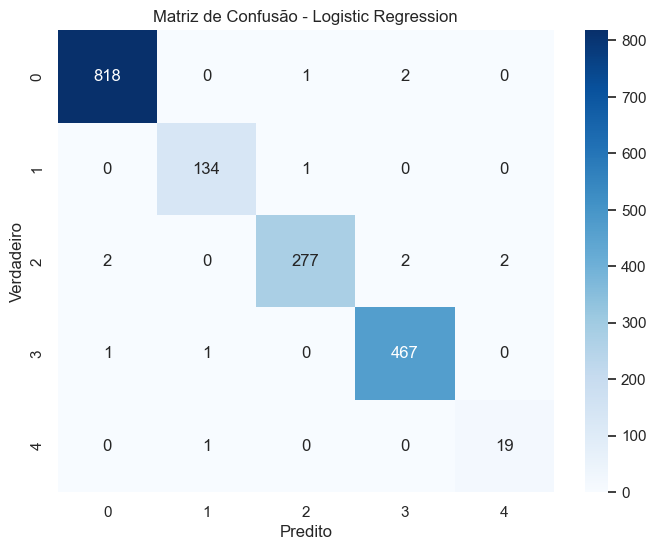

In [31]:
# -----------------------------------------------
# Etapa 2: Aprofundamento com Logistic Regression
# -----------------------------------------------

# Estratégia de validação cruzada com estratificação
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parâmetros para ajuste do Logistic Regression
# Exploração de combinações válidas de regularização e solvers
param_grid = []
solver_penalty_map = {
    "liblinear": ["l1", "l2"],
    "saga": ["l1", "l2", "elasticnet", "none"],
    "lbfgs": ["l2", "none"]
}

for solver, penalties in solver_penalty_map.items():
    for penalty in penalties:
        param_grid.append({
            "solver": [solver],
            "penalty": [penalty],
            "C": [0.001, 0.01, 0.1, 1, 10, 100],
            "max_iter": [100, 500, 1000]
        })

# Configuração do RandomizedSearchCV
random_search_lr = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_distributions=param_grid,
    scoring=make_scorer(f1_score, average="macro"),  # Usamos F1 macro
    cv=cv_strategy,
    n_iter=30,  # Limitar o número de combinações testadas
    random_state=42,
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    return_train_score=True
)

# Aplicando o RandomizedSearchCV no conjunto de treino
random_search_lr.fit(X_train_scaled, y_train)

# Resultados do melhor modelo
best_lr = random_search_lr.best_estimator_
print("Melhores parâmetros encontrados para Logistic Regression:")
print(random_search_lr.best_params_)

# Avaliação do melhor modelo nos conjuntos de treino e teste
y_train_pred = best_lr.predict(X_train_scaled)
y_test_pred = best_lr.predict(X_test_scaled)

train_f1 = f1_score(y_train, y_train_pred, average="macro")
test_f1 = f1_score(y_test, y_test_pred, average="macro")

print(f"\nF1-Score no conjunto de treino: {train_f1:.4f}")
print(f"F1-Score no conjunto de teste: {test_f1:.4f}")

# Matriz de Confusão no conjunto de teste
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nMatriz de Confusão no conjunto de teste:")
print(conf_matrix)

# Exibição detalhada dos resultados
results = pd.DataFrame(random_search_lr.cv_results_)
results = results.sort_values(by="mean_test_score", ascending=False)
print("\nTop 5 configurações de modelos:")
print(results[["param_penalty", "param_C", "param_solver", "mean_train_score", "mean_test_score"]].head())

# Visualização da matriz de confusão

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Logistic Regression")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

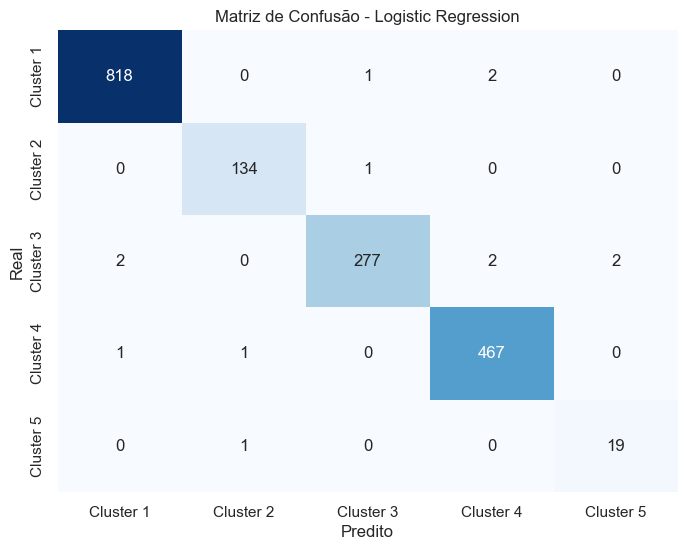


Relatório de Classificação:
              precision    recall  f1-score   support

   Cluster 1      0.996     0.996     0.996       821
   Cluster 2      0.985     0.993     0.989       135
   Cluster 3      0.993     0.979     0.986       283
   Cluster 4      0.992     0.996     0.994       469
   Cluster 5      0.905     0.950     0.927        20

    accuracy                          0.992      1728
   macro avg      0.974     0.983     0.978      1728
weighted avg      0.993     0.992     0.992      1728



In [32]:
# ----------------------------------------------------------
# Verificação do modelo com os melhores ajustes encontrados
# ----------------------------------------------------------


# Treinando o modelo Logistic Regression com os melhores hiperparâmetros
best_logistic_regression = LogisticRegression(
    solver="lbfgs",
    penalty="l2",
    max_iter=1000,
    C=100,
    random_state=42
)

# Ajustando o modelo nos dados de treino
best_logistic_regression.fit(X_train_scaled, y_train)

# Previsões no conjunto de teste
y_pred = best_logistic_regression.predict(X_test_scaled)

# Calculando a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False,
    xticklabels=[f"Cluster {i}" for i in sorted(y_test.unique())],
    yticklabels=[f"Cluster {i}" for i in sorted(y_test.unique())]
)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Logistic Regression")
plt.show()

# Exibindo o relatório de classificação com métricas detalhadas
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=[f"Cluster {i}" for i in sorted(y_test.unique())], digits=3))

---

#### 💡 Observações

**Análise do Pré-Processamento:**
- O carregamento do dataset original com os clusters preservou as informações da segmentação, conectando-as diretamente às variáveis originais. Isso garantiu contexto e consistência ao modelo preditivo.
- A seleção manual de features foi crucial para eliminar variáveis redundantes ou irrelevantes, reduzindo ruídos e simplificando o processo de treinamento.
- A divisão dos dados em treino e teste, utilizando estratificação, assegurou a representatividade dos clusters em ambos os conjuntos, minimizando o impacto do desbalanceamento.
- A padronização com **StandardScaler** foi aplicada corretamente, evitando vazamento de informações e alinhando as variáveis numéricas para o modelo.

**Análise da Escolha da Métrica:**
- O **F1-Score Macro** foi escolhido como métrica principal para lidar com o desbalanceamento entre os clusters, garantindo que todas as classes tivessem o mesmo peso na avaliação.
- O uso do F1-Score foi essencial para balancear precisão e recall, especialmente em classes menores, como o **Cluster 5**.
- A decisão de evitar a acurácia como métrica principal foi justificada pela sua insensibilidade ao desbalanceamento dos clusters.

---

#### 🔍 **Resultados do Modelo Logistic Regression**

**Melhores Hiperparâmetros Encontrados:**
- `solver`: `lbfgs`
- `penalty`: `l2`
- `max_iter`: `1000`
- `C`: `100`

**Desempenho Geral:**
- **F1-Score Macro**:
  - **Conjunto de Treino**: `0.999`
  - **Conjunto de Teste**: `0.978`
- **Acurácia no Conjunto de Teste**: `99.2%`

**Relatório de Classificação:**
| **Cluster** | **Precisão** | **Recall** | **F1-Score** | **Casos Totais** |
|-------------|--------------|------------|--------------|------------------|
| Cluster 1   | 0.996        | 0.996      | 0.996        | 821              |
| Cluster 2   | 0.985        | 0.993      | 0.989        | 135              |
| Cluster 3   | 0.993        | 0.979      | 0.986        | 283              |
| Cluster 4   | 0.992        | 0.996      | 0.994        | 469              |
| Cluster 5   | 0.905        | 0.950      | 0.927        | 20               |

**Médias:**
- **Macro Average** (média simples dos clusters):
  - Precisão: **0.974**
  - Recall: **0.983**
  - F1-Score: **0.978**
- **Weighted Average** (ponderada pelo número de casos por cluster):
  - Precisão: **0.993**
  - Recall: **0.992**
  - F1-Score: **0.992**

**Matriz de Confusão:**
- O modelo obteve alta precisão nos clusters maiores e resultados satisfatórios no cluster menor (Cluster 5), demonstrando sua robustez frente ao desbalanceamento.

---

#### 🔑 **Insights Importantes**

1. **Clusters Menores**:
   - O **Cluster 5** (apenas 20 casos) apresentou **90,5% de precisão** e **95% de recall**, destacando a capacidade do modelo de lidar com classes minoritárias.

2. **Alta Generalização**:
   - O pequeno gap entre F1-score de treino (`0.999`) e teste (`0.978`) indica que o modelo generaliza bem para novos dados.

3. **Influência da Clusterização Prévia**:
   - A segmentação inicial via K-Means contribuiu para a organização dos dados, facilitando a classificação pelos padrões detectados durante a clusterização.

---

#### 🚀 **Próximos Passos**

1. **Validação Adicional**:
   - Aplicar o modelo em um dataset sem clusters pré-definidos para avaliar a robustez e independência do modelo.

2. **Aprimoramento do Pipeline**:
   - Explorar o impacto de variáveis adicionais ou ajustes nos clusters na precisão geral.

3. **Documentação**:
   - Registrar todos os insights para futuras análises e justificar a escolha do modelo Logistic Regression para aplicações práticas.

---

**Conclusão**: O Logistic Regression demonstrou excelente desempenho em termos de precisão, recall e generalização, mesmo em classes menores. O uso da clusterização inicial foi um diferencial importante, mas deve ser analisado em contextos independentes para validar sua aplicabilidade. A solução atual apresenta resultados consistentes, alinhados ao objetivo do projeto.


## 8. Avaliação dos Modelos 📏 <a id="8-avaliação-dos-modelos"></a>
[Voltar ao Sumário](#sumário)

Nesta etapa do projeto, avaliamos os resultados obtidos tanto na clusterização quanto na modelagem preditiva, analisando seu impacto no negócio e as oportunidades de otimização. Esta abordagem integrada fornece insights importantes para a personalização de estratégias e mitigação de riscos no setor financeiro.

### 8.1 Clusterização

#### Resultados Técnicos
O algoritmo **K-Means** foi escolhido após avaliação de métricas como o **Silhouette Score** (0.1869) e o **Davies-Bouldin Index** (1.4961). Embora valores como o Silhouette Score estejam abaixo do ideal, o modelo conseguiu identificar padrões claros e fornecer segmentos úteis para análises subsequentes.

#### Insights dos Clusters
1. **Consumidores Moderados**: Representam clientes com comportamento estável, sendo candidatos ideais para campanhas de engajamento.
2. **Usuários de Crédito**: Preferem compras parceladas e produtos financeiros específicos, permitindo ações focadas no uso responsável do crédito.
3. **Compradores Ativos**: Com maior frequência de compras, são adequados para ofertas premium ou exclusivas.
4. **Consumidores Inativos**: Demandam estratégias de reativação para aumentar o engajamento.
5. **Clientes Premium**: Com alto volume de compras e pagamentos regulares, oferecem potencial para campanhas exclusivas de fidelização.

#### Reflexões e Aplicabilidade
Embora o K-Means tenha demonstrado eficácia, o uso de outras técnicas de clusterização, como DBSCAN ou Hierarchical Clustering, pode melhorar a separação dos clusters, especialmente em dados mais complexos. No entanto, os resultados já fornecem um alicerce para estratégias de marketing segmentadas.

---

### 8.2 Modelagem Preditiva

#### Contexto
A modelagem supervisionada foi utilizada para prever a qual cluster um cliente pertence, automatizando a classificação e escalando a aplicação dos insights obtidos na segmentação.

#### Resultados Técnicos
O modelo **Logistic Regression** foi selecionado como o melhor desempenho em relação a outros estimadores testados (Random Forest, Decision Tree, KNN, entre outros). Os melhores resultados foram:
- **F1-Score Macro no Conjunto de Teste**: **0.978**
- **Acurácia no Conjunto de Teste**: **99.2%**
- **Matriz de Confusão**: Demonstrou alta precisão na maioria dos clusters, com destaque para o Cluster 5 (classe minoritária), que obteve 90.5% de precisão e 95% de recall.

#### Impacto no Negócio
- **Automatização da Segmentação**: Atribuição automática de novos clientes aos clusters agiliza o processo de análise e personalização de estratégias.
- **Maior Precisão em Clusters Menores**: O bom desempenho no Cluster 5 garante que estratégias específicas para clientes premium possam ser desenvolvidas com segurança.
- **Redução de Custos**: A automação elimina a necessidade de revisões manuais frequentes.


---

### 8.3 Conexão com o Negócio

A integração entre clusterização e modelagem preditiva provou ser uma abordagem eficiente:
- **Clusterização**: Gera perfis claros que guiam decisões estratégicas em marketing e retenção.
- **Predição**: Automatiza e escala as aplicações práticas da segmentação, garantindo consistência e eficiência.

Essas técnicas juntas permitem maximizar a personalização e reduzir riscos, demonstrando o potencial transformador do aprendizado de máquina no setor financeiro. O sucesso deste projeto reforça a relevância da aplicação de técnicas de ciência de dados em cenários reais, trazendo benefícios tangíveis para a gestão de clientes e tomada de decisões estratégicas.

---



## 9. Conclusão e Recomendações 🏁<a id="9-conclusão-e-recomendações"></a>
[Voltar ao Sumário](#sumário)

### **Conclusão**  
O projeto demonstrou a eficácia da combinação entre técnicas de clusterização e modelagem preditiva no setor financeiro. A análise de clusterização permitiu a segmentação dos clientes em perfis distintos, fornecendo subsídios claros para ações de marketing personalizadas. Já a modelagem preditiva alcançou excelente desempenho na identificação de clientes inadimplentes, contribuindo diretamente para a mitigação de riscos financeiros.  

#### **Impacto no Negócio**  
1. **Clusterização**:  
   - Segmentação dos clientes em grupos bem definidos, facilitando a personalização de estratégias de retenção, ativação e engajamento.  
2. **Modelagem Preditiva**:  
   - Identificação automática de perfis de risco, otimizando o processo de gestão de crédito e reduzindo a exposição a inadimplência.  

Essas abordagens proporcionam insights práticos que fortalecem as tomadas de decisão e tornam os processos mais eficientes e ágeis.  

---

### **Recomendações**  

#### **Validação Contínua do Modelo**  
Embora o modelo preditivo tenha apresentado alta acurácia e recall, é importante reconhecer que ele foi treinado e avaliado dentro do mesmo universo de dados usado para a segmentação. Por isso:  
- **Acompanhamento Regular**: Colaborar com o time de negócios para validar periodicamente a eficácia do modelo em dados de produção.  
- **Revisão de Predições**: Confirmar com especialistas se as predições estão alinhadas com os comportamentos observados no mundo real.  
- **Análise de Novos Padrões**: Monitorar mudanças no comportamento dos clientes que possam exigir ajustes no modelo ou na segmentação.  

#### **Recomendações para o Negócio**  
1. **Marketing Personalizado**:  
   - Implementar campanhas específicas para cada cluster, ajustando mensagens e produtos às necessidades e características de cada perfil.  
2. **Gestão de Riscos**:  
   - Usar as predições do modelo como suporte para decisões de crédito, mas incluir uma etapa de validação adicional, especialmente para clusters mais vulneráveis.  

#### **Expansão do Projeto**  
- **Testes em Novos Contextos**: Aplicar a metodologia a produtos financeiros adicionais, como seguros ou investimentos, para diversificar os insights.  
- **Integração com Sistemas**: Conectar o modelo a sistemas como CRMs para automatizar e escalar o processo de segmentação e predição.  
- **Exploração de Novas Abordagens**: Avaliar o uso de dados externos ou variáveis adicionais que possam aumentar a robustez do modelo.  

---

O sucesso inicial deste projeto reforça o potencial das técnicas de aprendizado de máquina no setor financeiro. No entanto, sua aplicação prática exige um acompanhamento próximo e contínuo para garantir que os resultados estejam alinhados às necessidades do negócio e às expectativas dos stakeholders.  
